In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib

In [3]:
import os
import struct
import numpy as np
from utils import *



In [4]:
import sklearn
from sklearn.manifold import TSNE
from time import time

In [5]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [8]:
from glow import thops
from glow import modules
from glow import models
from glow.config import JsonConfig
import cv2

In [9]:
# import importlib
# reload(models)
# reload(modules)

In [10]:
lable_dict = {'/home/hyshuai/workspace/dataset/images_background/Grantha/character32': 605, '/home/hyshuai/workspace/dataset/images_background/Korean/character29': 276, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character40': 786, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character32': 319, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character07': 419, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character12': 415, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character13': 940, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character10': 591, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character11': 357, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character16': 87, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character17': 67, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character14': 908, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character15': 682, '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14': 295, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character12': 465, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character18': 744, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character19': 690, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character13': 720, '/home/hyshuai/workspace/dataset/images_background/Futurama/character18': 41, '/home/hyshuai/workspace/dataset/images_background/Futurama/character19': 402, '/home/hyshuai/workspace/dataset/images_background/Greek/character14': 768, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character10': 590, '/home/hyshuai/workspace/dataset/images_background/Futurama/character10': 983, '/home/hyshuai/workspace/dataset/images_background/Futurama/character11': 502, '/home/hyshuai/workspace/dataset/images_background/Futurama/character12': 583, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character11': 849, '/home/hyshuai/workspace/dataset/images_background/Futurama/character14': 520, '/home/hyshuai/workspace/dataset/images_background/Futurama/character15': 719, '/home/hyshuai/workspace/dataset/images_background/Futurama/character16': 526, '/home/hyshuai/workspace/dataset/images_background/Futurama/character17': 615, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character25': 195, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character24': 608, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character27': 310, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character26': 355, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character21': 66, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character20': 398, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character23': 287, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character22': 664, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character25': 646, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character24': 507, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character27': 815, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character26': 342, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character29': 624, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character28': 982, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character23': 481, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character22': 941, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character28': 471, '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24': 687, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character29': 578, '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21': 909, '/home/hyshuai/workspace/dataset/images_background/Futurama/character13': 70, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character45': 180, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character44': 83, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character47': 665, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character46': 809, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character41': 446, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character40': 821, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character43': 510, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character42': 8, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character22': 109, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character23': 120, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character20': 88, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character21': 562, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character49': 318, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character48': 539, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character23': 543, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character20': 942, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character21': 767, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character34': 770, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character35': 132, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character36': 362, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character37': 61, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character30': 973, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character31': 474, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character32': 138, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character33': 598, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character04': 607, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character38': 2, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character39': 38, '/home/hyshuai/workspace/dataset/images_background/Korean/character02': 85, '/home/hyshuai/workspace/dataset/images_background/Korean/character03': 162, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character21': 428, '/home/hyshuai/workspace/dataset/images_background/Korean/character01': 611, '/home/hyshuai/workspace/dataset/images_background/Korean/character06': 462, '/home/hyshuai/workspace/dataset/images_background/Korean/character07': 948, '/home/hyshuai/workspace/dataset/images_background/Korean/character04': 151, '/home/hyshuai/workspace/dataset/images_background/Korean/character05': 43, '/home/hyshuai/workspace/dataset/images_background/Grantha/character39': 76, '/home/hyshuai/workspace/dataset/images_background/Korean/character08': 449, '/home/hyshuai/workspace/dataset/images_background/Korean/character09': 707, '/home/hyshuai/workspace/dataset/images_background/Latin/character21': 459, '/home/hyshuai/workspace/dataset/images_background/Latin/character20': 883, '/home/hyshuai/workspace/dataset/images_background/Latin/character23': 816, '/home/hyshuai/workspace/dataset/images_background/Latin/character22': 509, '/home/hyshuai/workspace/dataset/images_background/Latin/character25': 56, '/home/hyshuai/workspace/dataset/images_background/Latin/character24': 951, '/home/hyshuai/workspace/dataset/images_background/Latin/character26': 399, '/home/hyshuai/workspace/dataset/images_background/Greek/character19': 129, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character01': 444, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character02': 594, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character03': 313, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character04': 976, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character05': 445, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character06': 673, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character07': 776, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character08': 277, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character09': 501, '/home/hyshuai/workspace/dataset/images_background/Greek/character07': 721, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character23': 743, '/home/hyshuai/workspace/dataset/images_background/Armenian/character29': 238, '/home/hyshuai/workspace/dataset/images_background/Armenian/character28': 366, '/home/hyshuai/workspace/dataset/images_background/Greek/character23': 739, '/home/hyshuai/workspace/dataset/images_background/Greek/character22': 775, '/home/hyshuai/workspace/dataset/images_background/Greek/character21': 40, '/home/hyshuai/workspace/dataset/images_background/Greek/character20': 967, '/home/hyshuai/workspace/dataset/images_background/Armenian/character23': 921, '/home/hyshuai/workspace/dataset/images_background/Armenian/character22': 798, '/home/hyshuai/workspace/dataset/images_background/Armenian/character21': 147, '/home/hyshuai/workspace/dataset/images_background/Greek/character24': 184, '/home/hyshuai/workspace/dataset/images_background/Balinese/character01': 864, '/home/hyshuai/workspace/dataset/images_background/Balinese/character03': 546, '/home/hyshuai/workspace/dataset/images_background/Balinese/character02': 866, '/home/hyshuai/workspace/dataset/images_background/Balinese/character05': 931, '/home/hyshuai/workspace/dataset/images_background/Balinese/character04': 916, '/home/hyshuai/workspace/dataset/images_background/Balinese/character07': 964, '/home/hyshuai/workspace/dataset/images_background/Balinese/character06': 617, '/home/hyshuai/workspace/dataset/images_background/Balinese/character09': 237, '/home/hyshuai/workspace/dataset/images_background/Balinese/character08': 580, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character22': 841, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character14': 58, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character15': 491, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character16': 443, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character17': 306, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character10': 737, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character11': 796, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character12': 616, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character13': 900, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character18': 243, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character19': 956, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character23': 82, '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16': 307, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character09': 301, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character08': 272, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character07': 112, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character06': 829, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character05': 701, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character04': 226, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character03': 765, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character02': 654, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character01': 832, '/home/hyshuai/workspace/dataset/images_background/Korean/character27': 412, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character40': 894, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character16': 285, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character22': 454, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character23': 10, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character20': 521, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character21': 442, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character26': 974, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character27': 302, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character24': 534, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character25': 351, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character24': 359, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character37': 934, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character28': 568, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character29': 300, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character32': 34, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character33': 979, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character30': 804, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character31': 560, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character12': 876, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character13': 980, '/home/hyshuai/workspace/dataset/images_background/Futurama/character03': 39, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character10': 337, '/home/hyshuai/workspace/dataset/images_background/Futurama/character02': 189, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character36': 338, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character37': 755, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character34': 376, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character35': 423, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character32': 35, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character33': 201, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character30': 886, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character31': 284, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character26': 211, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character27': 224, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character24': 124, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character25': 600, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character22': 749, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character30': 250, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character38': 924, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character39': 303, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character31': 925, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character14': 59, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character20': 927, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character36': 257, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character15': 209, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character37': 889, '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22': 20, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character26': 136, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character34': 552, '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35': 159, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character35': 652, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character45': 937, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character38': 278, '/home/hyshuai/workspace/dataset/images_background/Korean/character37': 199, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character39': 264, '/home/hyshuai/workspace/dataset/images_background/Korean/character34': 935, '/home/hyshuai/workspace/dataset/images_background/Korean/character40': 130, '/home/hyshuai/workspace/dataset/images_background/Korean/character36': 450, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character48': 25, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character44': 236, '/home/hyshuai/workspace/dataset/images_background/Armenian/character17': 73, '/home/hyshuai/workspace/dataset/images_background/Armenian/character14': 177, '/home/hyshuai/workspace/dataset/images_background/Armenian/character15': 13, '/home/hyshuai/workspace/dataset/images_background/Armenian/character12': 385, '/home/hyshuai/workspace/dataset/images_background/Armenian/character13': 292, '/home/hyshuai/workspace/dataset/images_background/Armenian/character10': 280, '/home/hyshuai/workspace/dataset/images_background/Armenian/character11': 619, '/home/hyshuai/workspace/dataset/images_background/Armenian/character18': 489, '/home/hyshuai/workspace/dataset/images_background/Armenian/character19': 144, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character25': 448, '/home/hyshuai/workspace/dataset/images_background/Grantha/character13': 364, '/home/hyshuai/workspace/dataset/images_background/Grantha/character12': 212, '/home/hyshuai/workspace/dataset/images_background/Grantha/character11': 936, '/home/hyshuai/workspace/dataset/images_background/Grantha/character10': 312, '/home/hyshuai/workspace/dataset/images_background/Grantha/character17': 811, '/home/hyshuai/workspace/dataset/images_background/Grantha/character16': 28, '/home/hyshuai/workspace/dataset/images_background/Grantha/character15': 145, '/home/hyshuai/workspace/dataset/images_background/Grantha/character14': 384, '/home/hyshuai/workspace/dataset/images_background/Grantha/character19': 621, '/home/hyshuai/workspace/dataset/images_background/Grantha/character18': 874, '/home/hyshuai/workspace/dataset/images_background/Braille/character08': 388, '/home/hyshuai/workspace/dataset/images_background/Braille/character09': 397, '/home/hyshuai/workspace/dataset/images_background/Braille/character04': 545, '/home/hyshuai/workspace/dataset/images_background/Braille/character05': 152, '/home/hyshuai/workspace/dataset/images_background/Braille/character06': 750, '/home/hyshuai/workspace/dataset/images_background/Braille/character07': 904, '/home/hyshuai/workspace/dataset/images_background/Braille/character01': 574, '/home/hyshuai/workspace/dataset/images_background/Braille/character02': 143, '/home/hyshuai/workspace/dataset/images_background/Braille/character03': 837, '/home/hyshuai/workspace/dataset/images_background/Bengali/character16': 514, '/home/hyshuai/workspace/dataset/images_background/Bengali/character17': 732, '/home/hyshuai/workspace/dataset/images_background/Bengali/character14': 825, '/home/hyshuai/workspace/dataset/images_background/Bengali/character15': 928, '/home/hyshuai/workspace/dataset/images_background/Bengali/character12': 320, '/home/hyshuai/workspace/dataset/images_background/Korean/character39': 485, '/home/hyshuai/workspace/dataset/images_background/Bengali/character10': 400, '/home/hyshuai/workspace/dataset/images_background/Bengali/character11': 606, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character29': 375, '/home/hyshuai/workspace/dataset/images_background/Korean/character38': 77, '/home/hyshuai/workspace/dataset/images_background/Bengali/character18': 265, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character28': 309, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character07': 553, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character06': 896, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character05': 475, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character04': 282, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character03': 483, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character02': 456, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character01': 981, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character22': 172, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character02': 409, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character29': 932, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character21': 266, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character09': 11, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character08': 187, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character32': 873, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character33': 666, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character30': 329, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character31': 17, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character34': 31, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character27': 46, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character26': 554, '/home/hyshuai/workspace/dataset/images_background/Armenian/character16': 297, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character32': 392, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character25': 84, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character03': 373, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character16': 213, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character21': 183, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character24': 573, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character20': 110, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character02': 592, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character34': 728, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character12': 3, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character33': 620, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character18': 100, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character19': 518, '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15': 486, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character14': 269, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character15': 182, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character16': 588, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character17': 36, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character10': 227, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character11': 708, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character12': 783, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character13': 478, '/home/hyshuai/workspace/dataset/images_background/Bengali/character32': 126, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character10': 167, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character11': 274, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character13': 855, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character13': 63, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character14': 29, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character15': 632, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character16': 533, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character30': 290, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character01': 500, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character07': 671, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character18': 494, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character19': 683, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character27': 516, '/home/hyshuai/workspace/dataset/images_background/Bengali/character19': 647, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character12': 477, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character13': 128, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character10': 92, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character11': 192, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character16': 344, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character17': 653, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character31': 158, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character15': 587, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character12': 327, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character14': 530, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character17': 944, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character16': 656, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character05': 135, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character10': 718, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character13': 785, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character12': 517, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character09': 54, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character08': 822, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character19': 644, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character18': 206, '/home/hyshuai/workspace/dataset/images_background/Bengali/character40': 426, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character12': 52, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character13': 258, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character10': 190, '/home/hyshuai/workspace/dataset/images_background/Greek/character12': 271, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character11': 669, '/home/hyshuai/workspace/dataset/images_background/Greek/character13': 589, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character36': 255, '/home/hyshuai/workspace/dataset/images_background/Greek/character10': 906, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character17': 968, '/home/hyshuai/workspace/dataset/images_background/Greek/character11': 572, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character14': 168, '/home/hyshuai/workspace/dataset/images_background/Greek/character16': 528, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character15': 166, '/home/hyshuai/workspace/dataset/images_background/Greek/character17': 542, '/home/hyshuai/workspace/dataset/images_background/Futurama/character07': 561, '/home/hyshuai/workspace/dataset/images_background/Futurama/character06': 863, '/home/hyshuai/workspace/dataset/images_background/Futurama/character05': 328, '/home/hyshuai/workspace/dataset/images_background/Futurama/character04': 978, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character32': 331, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character33': 349, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character30': 930, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character31': 350, '/home/hyshuai/workspace/dataset/images_background/Greek/character15': 496, '/home/hyshuai/workspace/dataset/images_background/Futurama/character09': 645, '/home/hyshuai/workspace/dataset/images_background/Futurama/character08': 369, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character23': 198, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character01': 5, '/home/hyshuai/workspace/dataset/images_background/Greek/character18': 33, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character31': 37, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character30': 872, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character33': 791, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character32': 383, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character35': 867, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character34': 738, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character37': 420, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character36': 117, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character39': 352, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character38': 898, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character29': 584, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character28': 65, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character24': 651, '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22': 253, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character25': 188, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character24': 676, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character27': 623, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character26': 241, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character21': 840, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character20': 635, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character23': 692, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character22': 430, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character29': 26, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character28': 72, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character13': 677, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character12': 108, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character11': 662, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character10': 148, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character08': 453, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character16': 729, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character03': 214, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character14': 119, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character17': 684, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character19': 12, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character18': 806, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character06': 836, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character15': 570, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character19': 291, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character18': 688, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character17': 75, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character16': 793, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character15': 835, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character14': 508, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character13': 910, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character12': 926, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character11': 325, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character10': 559, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character09': 149, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character02': 411, '/home/hyshuai/workspace/dataset/images_background/Bengali/character41': 210, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character21': 322, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character20': 218, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character22': 689, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character32': 104, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character23': 567, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character22': 228, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character33': 267, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character20': 686, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character27': 746, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character26': 577, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character25': 575, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character24': 953, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character29': 460, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character28': 710, '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17': 51, '/home/hyshuai/workspace/dataset/images_background/Korean/character19': 441, '/home/hyshuai/workspace/dataset/images_background/Korean/character18': 472, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character22': 204, '/home/hyshuai/workspace/dataset/images_background/Korean/character15': 367, '/home/hyshuai/workspace/dataset/images_background/Korean/character14': 670, '/home/hyshuai/workspace/dataset/images_background/Korean/character17': 513, '/home/hyshuai/workspace/dataset/images_background/Korean/character16': 830, '/home/hyshuai/workspace/dataset/images_background/Korean/character11': 451, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character21': 434, '/home/hyshuai/workspace/dataset/images_background/Korean/character13': 125, '/home/hyshuai/workspace/dataset/images_background/Korean/character12': 700, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character20': 156, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character28': 571, '/home/hyshuai/workspace/dataset/images_background/Bengali/character43': 370, '/home/hyshuai/workspace/dataset/images_background/Grantha/character08': 118, '/home/hyshuai/workspace/dataset/images_background/Grantha/character09': 407, '/home/hyshuai/workspace/dataset/images_background/Grantha/character04': 121, '/home/hyshuai/workspace/dataset/images_background/Grantha/character05': 586, '/home/hyshuai/workspace/dataset/images_background/Grantha/character06': 452, '/home/hyshuai/workspace/dataset/images_background/Grantha/character07': 380, '/home/hyshuai/workspace/dataset/images_background/Grantha/character01': 275, '/home/hyshuai/workspace/dataset/images_background/Grantha/character02': 155, '/home/hyshuai/workspace/dataset/images_background/Grantha/character03': 723, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character50': 89, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character51': 231, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character06': 153, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character07': 235, '/home/hyshuai/workspace/dataset/images_background/Bengali/character23': 248, '/home/hyshuai/workspace/dataset/images_background/Bengali/character42': 884, '/home/hyshuai/workspace/dataset/images_background/Futurama/character01': 792, '/home/hyshuai/workspace/dataset/images_background/Korean/character32': 888, '/home/hyshuai/workspace/dataset/images_background/Bengali/character27': 633, '/home/hyshuai/workspace/dataset/images_background/Bengali/character26': 296, '/home/hyshuai/workspace/dataset/images_background/Bengali/character25': 268, '/home/hyshuai/workspace/dataset/images_background/Bengali/character24': 780, '/home/hyshuai/workspace/dataset/images_background/Bengali/character29': 346, '/home/hyshuai/workspace/dataset/images_background/Bengali/character28': 582, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character40': 334, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character42': 164, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character06': 977, '/home/hyshuai/workspace/dataset/images_background/Bengali/character45': 696, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character07': 603, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character06': 965, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character09': 505, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character08': 340, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character03': 957, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character02': 754, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character01': 416, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character03': 422, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character02': 247, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character01': 871, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character07': 134, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character06': 595, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character05': 114, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character04': 178, '/home/hyshuai/workspace/dataset/images_background/Bengali/character44': 599, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character19': 394, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character18': 695, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character11': 356, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character10': 818, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character13': 954, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character12': 778, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character15': 86, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character14': 887, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character17': 869, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character16': 484, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character20': 892, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character21': 361, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character22': 94, '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19': 631, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character10': 537, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character11': 141, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character12': 643, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character13': 480, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character14': 140, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character15': 705, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character16': 759, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character17': 779, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character18': 639, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character19': 103, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character25': 476, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character26': 193, '/home/hyshuai/workspace/dataset/images_background/Bengali/character46': 699, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character27': 506, '/home/hyshuai/workspace/dataset/images_background/Korean/character24': 413, '/home/hyshuai/workspace/dataset/images_background/Korean/character25': 15, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character18': 614, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character19': 660, '/home/hyshuai/workspace/dataset/images_background/Korean/character20': 827, '/home/hyshuai/workspace/dataset/images_background/Korean/character21': 972, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character29': 161, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character28': 127, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character27': 852, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character26': 848, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character25': 21, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character24': 14, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character23': 260, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character22': 234, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character21': 90, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character20': 493, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character17': 490, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character11': 80, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character21': 174, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character20': 473, '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24': 858, '/home/hyshuai/workspace/dataset/images_background/Latin/character09': 50, '/home/hyshuai/workspace/dataset/images_background/Latin/character08': 165, '/home/hyshuai/workspace/dataset/images_background/Latin/character07': 175, '/home/hyshuai/workspace/dataset/images_background/Latin/character06': 794, '/home/hyshuai/workspace/dataset/images_background/Latin/character05': 160, '/home/hyshuai/workspace/dataset/images_background/Latin/character04': 95, '/home/hyshuai/workspace/dataset/images_background/Latin/character03': 374, '/home/hyshuai/workspace/dataset/images_background/Latin/character02': 538, '/home/hyshuai/workspace/dataset/images_background/Latin/character01': 640, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character17': 762, '/home/hyshuai/workspace/dataset/images_background/Bengali/character13': 726, '/home/hyshuai/workspace/dataset/images_background/Armenian/character05': 703, '/home/hyshuai/workspace/dataset/images_background/Armenian/character04': 535, '/home/hyshuai/workspace/dataset/images_background/Armenian/character07': 447, '/home/hyshuai/workspace/dataset/images_background/Armenian/character06': 333, '/home/hyshuai/workspace/dataset/images_background/Armenian/character01': 315, '/home/hyshuai/workspace/dataset/images_background/Armenian/character03': 569, '/home/hyshuai/workspace/dataset/images_background/Armenian/character02': 612, '/home/hyshuai/workspace/dataset/images_background/Armenian/character09': 548, '/home/hyshuai/workspace/dataset/images_background/Armenian/character08': 733, '/home/hyshuai/workspace/dataset/images_background/Grantha/character40': 251, '/home/hyshuai/workspace/dataset/images_background/Grantha/character41': 261, '/home/hyshuai/workspace/dataset/images_background/Grantha/character42': 847, '/home/hyshuai/workspace/dataset/images_background/Grantha/character43': 62, '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14': 27, '/home/hyshuai/workspace/dataset/images_background/Korean/character22': 259, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character25': 317, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character24': 756, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character27': 44, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character26': 667, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character21': 805, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character20': 281, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character23': 185, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character22': 410, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character29': 436, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character28': 32, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character14': 531, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character15': 353, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character16': 529, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character17': 814, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character10': 191, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character11': 551, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character12': 19, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character13': 784, '/home/hyshuai/workspace/dataset/images_background/Bengali/character34': 288, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character18': 903, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character19': 371, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character48': 458, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character49': 704, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character18': 432, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character19': 294, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character40': 49, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character41': 751, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character42': 826, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character43': 920, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character44': 801, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character45': 736, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character46': 885, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character47': 638, '/home/hyshuai/workspace/dataset/images_background/Bengali/character35': 913, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character40': 753, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character41': 698, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character42': 497, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character43': 205, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character44': 207, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character45': 757, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character46': 969, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character47': 752, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character23': 564, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character22': 668, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character21': 659, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character20': 813, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character07': 907, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character26': 335, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character25': 96, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character24': 650, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character09': 345, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character08': 7, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character29': 532, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character28': 691, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character01': 854, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character02': 219, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character03': 628, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character04': 579, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character05': 862, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character06': 256, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character07': 1, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character08': 113, '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character09': 69, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character10': 97, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character11': 379, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character16': 24, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character17': 106, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character01': 504, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character14': 479, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character20': 372, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character15': 547, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character03': 457, '/home/hyshuai/workspace/dataset/images_background/Bengali/character33': 842, '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11': 714, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character02': 938, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character05': 304, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character04': 740, '/home/hyshuai/workspace/dataset/images_background/Grantha/character35': 239, '/home/hyshuai/workspace/dataset/images_background/Grantha/character34': 709, '/home/hyshuai/workspace/dataset/images_background/Grantha/character37': 157, '/home/hyshuai/workspace/dataset/images_background/Grantha/character36': 406, '/home/hyshuai/workspace/dataset/images_background/Grantha/character31': 525, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character08': 975, '/home/hyshuai/workspace/dataset/images_background/Grantha/character33': 194, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character01': 634, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character05': 609, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character04': 565, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character14': 901, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character06': 713, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character01': 170, '/home/hyshuai/workspace/dataset/images_background/Grantha/character38': 363, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character03': 314, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character02': 495, '/home/hyshuai/workspace/dataset/images_background/Braille/character26': 730, '/home/hyshuai/workspace/dataset/images_background/Braille/character24': 176, '/home/hyshuai/workspace/dataset/images_background/Braille/character25': 332, '/home/hyshuai/workspace/dataset/images_background/Braille/character22': 305, '/home/hyshuai/workspace/dataset/images_background/Braille/character23': 859, '/home/hyshuai/workspace/dataset/images_background/Braille/character20': 760, '/home/hyshuai/workspace/dataset/images_background/Braille/character21': 550, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character08': 604, '/home/hyshuai/workspace/dataset/images_background/Greek/character09': 845, '/home/hyshuai/workspace/dataset/images_background/Greek/character08': 761, '/home/hyshuai/workspace/dataset/images_background/Greek/character05': 877, '/home/hyshuai/workspace/dataset/images_background/Greek/character04': 735, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character17': 200, '/home/hyshuai/workspace/dataset/images_background/Greek/character06': 23, '/home/hyshuai/workspace/dataset/images_background/Greek/character01': 498, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character05': 249, '/home/hyshuai/workspace/dataset/images_background/Greek/character03': 386, '/home/hyshuai/workspace/dataset/images_background/Greek/character02': 71, '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19': 828, '/home/hyshuai/workspace/dataset/images_background/Balinese/character23': 330, '/home/hyshuai/workspace/dataset/images_background/Balinese/character22': 929, '/home/hyshuai/workspace/dataset/images_background/Balinese/character21': 68, '/home/hyshuai/workspace/dataset/images_background/Balinese/character20': 418, '/home/hyshuai/workspace/dataset/images_background/Balinese/character24': 273, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character18': 850, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character19': 782, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character47': 217, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character46': 186, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character41': 781, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character40': 844, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character43': 470, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character42': 233, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character10': 246, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character11': 895, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character12': 962, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character13': 950, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character14': 823, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character15': 221, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character16': 139, '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character17': 196, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character03': 469, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character02': 468, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character01': 648, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character08': 715, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character09': 123, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character15': 742, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character02': 347, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character03': 382, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character04': 377, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character06': 637, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character32': 323, '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character04': 838, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character06': 706, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character18': 404, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character19': 354, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character08': 316, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character09': 685, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character04': 102, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character05': 523, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character06': 522, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character07': 581, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character16': 860, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character01': 797, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character02': 57, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character03': 515, '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07': 79, '/home/hyshuai/workspace/dataset/images_background/Armenian/character27': 263, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character14': 712, '/home/hyshuai/workspace/dataset/images_background/Armenian/character26': 959, '/home/hyshuai/workspace/dataset/images_background/Armenian/character25': 820, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character18': 911, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character19': 613, '/home/hyshuai/workspace/dataset/images_background/Armenian/character24': 716, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character10': 711, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character11': 741, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character12': 381, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character13': 98, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character14': 693, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character15': 882, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character16': 774, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character17': 576, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character04': 53, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character05': 173, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character13': 429, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character07': 487, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character41': 853, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character01': 788, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character02': 440, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character03': 672, '/home/hyshuai/workspace/dataset/images_background/Armenian/character20': 787, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character08': 242, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character09': 107, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character12': 321, '/home/hyshuai/workspace/dataset/images_background/Latin/character18': 618, '/home/hyshuai/workspace/dataset/images_background/Latin/character19': 945, '/home/hyshuai/workspace/dataset/images_background/Latin/character14': 918, '/home/hyshuai/workspace/dataset/images_background/Latin/character15': 878, '/home/hyshuai/workspace/dataset/images_background/Latin/character16': 308, '/home/hyshuai/workspace/dataset/images_background/Latin/character17': 961, '/home/hyshuai/workspace/dataset/images_background/Latin/character10': 960, '/home/hyshuai/workspace/dataset/images_background/Latin/character11': 390, '/home/hyshuai/workspace/dataset/images_background/Latin/character12': 81, '/home/hyshuai/workspace/dataset/images_background/Latin/character13': 970, '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16': 912, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character39': 311, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character08': 244, '/home/hyshuai/workspace/dataset/images_background/Bengali/character21': 839, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character11': 512, '/home/hyshuai/workspace/dataset/images_background/Armenian/character30': 401, '/home/hyshuai/workspace/dataset/images_background/Armenian/character31': 636, '/home/hyshuai/workspace/dataset/images_background/Armenian/character32': 763, '/home/hyshuai/workspace/dataset/images_background/Armenian/character33': 240, '/home/hyshuai/workspace/dataset/images_background/Armenian/character34': 846, '/home/hyshuai/workspace/dataset/images_background/Armenian/character35': 773, '/home/hyshuai/workspace/dataset/images_background/Armenian/character36': 116, '/home/hyshuai/workspace/dataset/images_background/Armenian/character37': 131, '/home/hyshuai/workspace/dataset/images_background/Armenian/character38': 414, '/home/hyshuai/workspace/dataset/images_background/Armenian/character39': 99, '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character10': 748, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character11': 169, '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24': 843, '/home/hyshuai/workspace/dataset/images_background/Bengali/character22': 78, '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29': 717, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character09': 658, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character08': 464, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character05': 179, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character04': 702, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character07': 655, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character06': 856, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character01': 923, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character03': 899, '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character02': 208, '/home/hyshuai/workspace/dataset/images_background/Bengali/character38': 254, '/home/hyshuai/workspace/dataset/images_background/Bengali/character39': 734, '/home/hyshuai/workspace/dataset/images_background/Futurama/character25': 222, '/home/hyshuai/workspace/dataset/images_background/Futurama/character24': 421, '/home/hyshuai/workspace/dataset/images_background/Bengali/character36': 163, '/home/hyshuai/workspace/dataset/images_background/Futurama/character26': 789, '/home/hyshuai/workspace/dataset/images_background/Futurama/character21': 417, '/home/hyshuai/workspace/dataset/images_background/Futurama/character20': 933, '/home/hyshuai/workspace/dataset/images_background/Futurama/character23': 105, '/home/hyshuai/workspace/dataset/images_background/Futurama/character22': 146, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character29': 731, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character28': 747, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character55': 408, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character54': 341, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character53': 74, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character52': 769, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character51': 601, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character50': 807, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character21': 433, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character20': 279, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character23': 558, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character22': 902, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character25': 393, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character24': 358, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character27': 111, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character26': 897, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character09': 914, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character08': 283, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character01': 18, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character03': 657, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character02': 955, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character05': 424, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character04': 674, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character07': 348, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character06': 387, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character41': 790, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character40': 215, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character39': 649, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character38': 602, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character35': 142, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character34': 466, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character37': 541, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character36': 245, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character31': 482, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character30': 890, '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character33': 597, '/home/hyshuai/workspace/dataset/images_background/Armenian/character40': 202, '/home/hyshuai/workspace/dataset/images_background/Bengali/character05': 42, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character30': 427, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character31': 203, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character32': 368, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character33': 680, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character34': 431, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character35': 324, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character36': 868, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character37': 438, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character38': 229, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character39': 439, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character03': 593, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character02': 893, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character01': 467, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character07': 905, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character06': 834, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character05': 626, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character04': 30, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character09': 824, '/home/hyshuai/workspace/dataset/images_background/Hebrew/character08': 9, '/home/hyshuai/workspace/dataset/images_background/Bengali/character37': 556, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character12': 154, '/home/hyshuai/workspace/dataset/images_background/Bengali/character30': 766, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character05': 625, '/home/hyshuai/workspace/dataset/images_background/Bengali/character31': 378, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character09': 851, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character08': 336, '/home/hyshuai/workspace/dataset/images_background/Korean/character35': 799, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character04': 610, '/home/hyshuai/workspace/dataset/images_background/Korean/character33': 663, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character14': 93, '/home/hyshuai/workspace/dataset/images_background/Korean/character31': 557, '/home/hyshuai/workspace/dataset/images_background/Korean/character30': 137, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character01': 795, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character03': 919, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character02': 563, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character05': 966, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character04': 286, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character07': 939, '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character06': 915, '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23': 661, '/home/hyshuai/workspace/dataset/images_background/Grantha/character26': 627, '/home/hyshuai/workspace/dataset/images_background/Grantha/character27': 115, '/home/hyshuai/workspace/dataset/images_background/Grantha/character24': 223, '/home/hyshuai/workspace/dataset/images_background/Grantha/character25': 817, '/home/hyshuai/workspace/dataset/images_background/Grantha/character22': 891, '/home/hyshuai/workspace/dataset/images_background/Grantha/character23': 289, '/home/hyshuai/workspace/dataset/images_background/Grantha/character20': 197, '/home/hyshuai/workspace/dataset/images_background/Grantha/character21': 724, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character52': 745, '/home/hyshuai/workspace/dataset/images_background/Grantha/character28': 298, '/home/hyshuai/workspace/dataset/images_background/Grantha/character29': 758, '/home/hyshuai/workspace/dataset/images_background/Braille/character13': 45, '/home/hyshuai/workspace/dataset/images_background/Braille/character12': 91, '/home/hyshuai/workspace/dataset/images_background/Braille/character11': 499, '/home/hyshuai/workspace/dataset/images_background/Braille/character10': 492, '/home/hyshuai/workspace/dataset/images_background/Braille/character17': 64, '/home/hyshuai/workspace/dataset/images_background/Braille/character16': 463, '/home/hyshuai/workspace/dataset/images_background/Braille/character15': 425, '/home/hyshuai/workspace/dataset/images_background/Braille/character14': 389, '/home/hyshuai/workspace/dataset/images_background/Braille/character19': 225, '/home/hyshuai/workspace/dataset/images_background/Braille/character18': 536, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character33': 232, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character07': 540, '/home/hyshuai/workspace/dataset/images_background/Bengali/character07': 339, '/home/hyshuai/workspace/dataset/images_background/Bengali/character06': 722, '/home/hyshuai/workspace/dataset/images_background/Bengali/character01': 810, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character09': 678, '/home/hyshuai/workspace/dataset/images_background/Bengali/character03': 60, '/home/hyshuai/workspace/dataset/images_background/Bengali/character02': 802, '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character08': 230, '/home/hyshuai/workspace/dataset/images_background/Bengali/character09': 262, '/home/hyshuai/workspace/dataset/images_background/Bengali/character08': 622, '/home/hyshuai/workspace/dataset/images_background/Balinese/character12': 943, '/home/hyshuai/workspace/dataset/images_background/Balinese/character13': 764, '/home/hyshuai/workspace/dataset/images_background/Balinese/character10': 675, '/home/hyshuai/workspace/dataset/images_background/Balinese/character11': 403, '/home/hyshuai/workspace/dataset/images_background/Balinese/character16': 461, '/home/hyshuai/workspace/dataset/images_background/Balinese/character17': 293, '/home/hyshuai/workspace/dataset/images_background/Balinese/character14': 343, '/home/hyshuai/workspace/dataset/images_background/Balinese/character15': 405, '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20': 122, '/home/hyshuai/workspace/dataset/images_background/Balinese/character18': 511, '/home/hyshuai/workspace/dataset/images_background/Balinese/character19': 519, '/home/hyshuai/workspace/dataset/images_background/Bengali/character04': 800, '/home/hyshuai/workspace/dataset/images_background/Korean/character23': 16, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character10': 55, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character15': 6, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character12': 641, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character13': 0, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character14': 681, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character15': 503, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character16': 596, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character13': 22, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character18': 963, '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character19': 396, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character10': 946, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character11': 971, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character11': 875, '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character04': 101, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character09': 952, '/home/hyshuai/workspace/dataset/images_background/Arcadian/character08': 365, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character19': 435, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character18': 958, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character14': 771, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character35': 220, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character13': 947, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character12': 47, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character11': 922, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character10': 949, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character17': 629, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character16': 697, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character15': 870, '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character14': 917, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character09': 555, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character37': 455, '/home/hyshuai/workspace/dataset/images_background/Korean/character26': 216, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character03': 725, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character30': 831, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character01': 133, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character07': 326, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character06': 585, '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character05': 4, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character31': 630, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character38': 391, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character09': 270, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character08': 803, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character07': 488, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character06': 772, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character05': 861, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character04': 881, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character03': 812, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character02': 171, '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character01': 857, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character09': 360, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character36': 819, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character01': 694, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character03': 865, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character02': 252, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character05': 777, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character34': 524, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character07': 181, '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character06': 566, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character05': 395, '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character35': 642, '/home/hyshuai/workspace/dataset/images_background/Korean/character10': 808, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character38': 833, '/home/hyshuai/workspace/dataset/images_background/Gujarati/character39': 48, '/home/hyshuai/workspace/dataset/images_background/Bengali/character20': 544, '/home/hyshuai/workspace/dataset/images_background/N_Ko/character04': 880, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character06': 437, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character07': 299, '/home/hyshuai/workspace/dataset/images_background/Armenian/character41': 879, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character04': 527, '/home/hyshuai/workspace/dataset/images_background/Korean/character28': 150, '/home/hyshuai/workspace/dataset/images_background/Tagalog/character05': 679, '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character09': 549, '/home/hyshuai/workspace/dataset/images_background/Grantha/character30': 727}

In [11]:
print(lable_dict['/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22'])
print(lable_dict['/home/hyshuai/workspace/dataset/images_background/Grantha/character19'])

20
621


In [12]:
class_list_negative = ['/home/hyshuai/workspace/dataset/images_background/Grantha/character42', '/home/hyshuai/workspace/dataset/images_background/Grantha/character08', '/home/hyshuai/workspace/dataset/images_background/Grantha/character13', '/home/hyshuai/workspace/dataset/images_background/Grantha/character35', '/home/hyshuai/workspace/dataset/images_background/Grantha/character39', '/home/hyshuai/workspace/dataset/images_background/Grantha/character11', '/home/hyshuai/workspace/dataset/images_background/Grantha/character19', '/home/hyshuai/workspace/dataset/images_background/Grantha/character01', '/home/hyshuai/workspace/dataset/images_background/Grantha/character04', '/home/hyshuai/workspace/dataset/images_background/Grantha/character10', '/home/hyshuai/workspace/dataset/images_background/Grantha/character07', '/home/hyshuai/workspace/dataset/images_background/Grantha/character28', '/home/hyshuai/workspace/dataset/images_background/Grantha/character30', '/home/hyshuai/workspace/dataset/images_background/Grantha/character15', '/home/hyshuai/workspace/dataset/images_background/Grantha/character40', '/home/hyshuai/workspace/dataset/images_background/Grantha/character22', '/home/hyshuai/workspace/dataset/images_background/Grantha/character05', '/home/hyshuai/workspace/dataset/images_background/Grantha/character03', '/home/hyshuai/workspace/dataset/images_background/Grantha/character27', '/home/hyshuai/workspace/dataset/images_background/Grantha/character12', '/home/hyshuai/workspace/dataset/images_background/Grantha/character36', '/home/hyshuai/workspace/dataset/images_background/Grantha/character43', '/home/hyshuai/workspace/dataset/images_background/Grantha/character21', '/home/hyshuai/workspace/dataset/images_background/Grantha/character32', '/home/hyshuai/workspace/dataset/images_background/Grantha/character02', '/home/hyshuai/workspace/dataset/images_background/Grantha/character24', '/home/hyshuai/workspace/dataset/images_background/Grantha/character17', '/home/hyshuai/workspace/dataset/images_background/Grantha/character23', '/home/hyshuai/workspace/dataset/images_background/Grantha/character14', '/home/hyshuai/workspace/dataset/images_background/Grantha/character31', '/home/hyshuai/workspace/dataset/images_background/Grantha/character37', '/home/hyshuai/workspace/dataset/images_background/Grantha/character18', '/home/hyshuai/workspace/dataset/images_background/Grantha/character38', '/home/hyshuai/workspace/dataset/images_background/Grantha/character26', '/home/hyshuai/workspace/dataset/images_background/Grantha/character25', '/home/hyshuai/workspace/dataset/images_background/Grantha/character20', '/home/hyshuai/workspace/dataset/images_background/Grantha/character09', '/home/hyshuai/workspace/dataset/images_background/Grantha/character16', '/home/hyshuai/workspace/dataset/images_background/Grantha/character41', '/home/hyshuai/workspace/dataset/images_background/Grantha/character06', '/home/hyshuai/workspace/dataset/images_background/Grantha/character34', '/home/hyshuai/workspace/dataset/images_background/Grantha/character33', '/home/hyshuai/workspace/dataset/images_background/Grantha/character29', '/home/hyshuai/workspace/dataset/images_background/Braille/character08', '/home/hyshuai/workspace/dataset/images_background/Braille/character13', '/home/hyshuai/workspace/dataset/images_background/Braille/character11', '/home/hyshuai/workspace/dataset/images_background/Braille/character19', '/home/hyshuai/workspace/dataset/images_background/Braille/character01', '/home/hyshuai/workspace/dataset/images_background/Braille/character04', '/home/hyshuai/workspace/dataset/images_background/Braille/character10', '/home/hyshuai/workspace/dataset/images_background/Braille/character07', '/home/hyshuai/workspace/dataset/images_background/Braille/character15', '/home/hyshuai/workspace/dataset/images_background/Braille/character22', '/home/hyshuai/workspace/dataset/images_background/Braille/character05', '/home/hyshuai/workspace/dataset/images_background/Braille/character03', '/home/hyshuai/workspace/dataset/images_background/Braille/character12', '/home/hyshuai/workspace/dataset/images_background/Braille/character21', '/home/hyshuai/workspace/dataset/images_background/Braille/character02', '/home/hyshuai/workspace/dataset/images_background/Braille/character24', '/home/hyshuai/workspace/dataset/images_background/Braille/character17', '/home/hyshuai/workspace/dataset/images_background/Braille/character23', '/home/hyshuai/workspace/dataset/images_background/Braille/character14', '/home/hyshuai/workspace/dataset/images_background/Braille/character18', '/home/hyshuai/workspace/dataset/images_background/Braille/character26', '/home/hyshuai/workspace/dataset/images_background/Braille/character25', '/home/hyshuai/workspace/dataset/images_background/Braille/character20', '/home/hyshuai/workspace/dataset/images_background/Braille/character09', '/home/hyshuai/workspace/dataset/images_background/Braille/character16', '/home/hyshuai/workspace/dataset/images_background/Braille/character06', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character08', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character13', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character35', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character39', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character11', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character19', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character01', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character04', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character10', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character07', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character28', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character30', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character15', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character40', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character22', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character05', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character03', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character27', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character12', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character36', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character21', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character32', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character02', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character24', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character17', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character23', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character14', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character31', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character37', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character18', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character38', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character26', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character25', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character20', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character09', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character16', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character41', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character06', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character34', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character33', '/home/hyshuai/workspace/dataset/images_background/Mkhedruli_(Georgian)/character29', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character08', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character13', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character11', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character01', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character04', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character10', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character07', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character15', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character05', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character03', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character12', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character02', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character17', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character14', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character09', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character16', '/home/hyshuai/workspace/dataset/images_background/Tagalog/character06', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character08', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character13', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character11', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character19', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character01', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character04', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character10', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character07', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character15', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character22', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character05', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character03', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character12', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character21', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character02', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character17', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character14', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character18', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character20', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character09', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character16', '/home/hyshuai/workspace/dataset/images_background/Hebrew/character06', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character08', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character13', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character11', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character19', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character01', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character04', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character10', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character07', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character15', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character05', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character03', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character12', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character02', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character17', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character14', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character18', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character20', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character09', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character16', '/home/hyshuai/workspace/dataset/images_background/Alphabet_of_the_Magi/character06', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character08', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character13', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character11', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character01', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character04', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character10', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character07', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character05', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character03', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character12', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character02', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character14', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character09', '/home/hyshuai/workspace/dataset/images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)/character06', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character42', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character08', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character13', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character35', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character39', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character54', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character11', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character19', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character01', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character04', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character10', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character07', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character28', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character30', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character15', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character40', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character44', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character22', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character05', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character03', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character27', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character12', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character36', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character43', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character51', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character53', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character21', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character52', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character32', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character02', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character24', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character17', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character23', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character49', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character50', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character14', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character31', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character37', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character18', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character38', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character26', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character45', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character25', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character46', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character20', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character09', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character47', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character16', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character48', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character41', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character55', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character06', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character34', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character33', '/home/hyshuai/workspace/dataset/images_background/Tifinagh/character29', '/home/hyshuai/workspace/dataset/images_background/Latin/character08', '/home/hyshuai/workspace/dataset/images_background/Latin/character13', '/home/hyshuai/workspace/dataset/images_background/Latin/character11', '/home/hyshuai/workspace/dataset/images_background/Latin/character19', '/home/hyshuai/workspace/dataset/images_background/Latin/character01', '/home/hyshuai/workspace/dataset/images_background/Latin/character04', '/home/hyshuai/workspace/dataset/images_background/Latin/character10', '/home/hyshuai/workspace/dataset/images_background/Latin/character07', '/home/hyshuai/workspace/dataset/images_background/Latin/character15', '/home/hyshuai/workspace/dataset/images_background/Latin/character22', '/home/hyshuai/workspace/dataset/images_background/Latin/character05', '/home/hyshuai/workspace/dataset/images_background/Latin/character03', '/home/hyshuai/workspace/dataset/images_background/Latin/character12', '/home/hyshuai/workspace/dataset/images_background/Latin/character21', '/home/hyshuai/workspace/dataset/images_background/Latin/character02', '/home/hyshuai/workspace/dataset/images_background/Latin/character24', '/home/hyshuai/workspace/dataset/images_background/Latin/character17', '/home/hyshuai/workspace/dataset/images_background/Latin/character23', '/home/hyshuai/workspace/dataset/images_background/Latin/character14', '/home/hyshuai/workspace/dataset/images_background/Latin/character18', '/home/hyshuai/workspace/dataset/images_background/Latin/character26', '/home/hyshuai/workspace/dataset/images_background/Latin/character25', '/home/hyshuai/workspace/dataset/images_background/Latin/character20', '/home/hyshuai/workspace/dataset/images_background/Latin/character09', '/home/hyshuai/workspace/dataset/images_background/Latin/character16', '/home/hyshuai/workspace/dataset/images_background/Latin/character06', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character08', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character13', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character11', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character19', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character01', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character04', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character10', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character07', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character28', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character30', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character15', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character22', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character05', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character03', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character27', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character12', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character21', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character32', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character02', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character24', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character17', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character23', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character14', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character31', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character18', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character26', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character25', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character20', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character09', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character16', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character06', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character34', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character33', '/home/hyshuai/workspace/dataset/images_background/Burmese_(Myanmar)/character29', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character08', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character13', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character11', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character01', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character04', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character10', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character07', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character05', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character03', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character12', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character02', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character14', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character09', '/home/hyshuai/workspace/dataset/images_background/Blackfoot_(Canadian_Aboriginal_Syllabics)/character06', '/home/hyshuai/workspace/dataset/images_background/Balinese/character08', '/home/hyshuai/workspace/dataset/images_background/Balinese/character13', '/home/hyshuai/workspace/dataset/images_background/Balinese/character11', '/home/hyshuai/workspace/dataset/images_background/Balinese/character19', '/home/hyshuai/workspace/dataset/images_background/Balinese/character01', '/home/hyshuai/workspace/dataset/images_background/Balinese/character04', '/home/hyshuai/workspace/dataset/images_background/Balinese/character10', '/home/hyshuai/workspace/dataset/images_background/Balinese/character07', '/home/hyshuai/workspace/dataset/images_background/Balinese/character15', '/home/hyshuai/workspace/dataset/images_background/Balinese/character22', '/home/hyshuai/workspace/dataset/images_background/Balinese/character05', '/home/hyshuai/workspace/dataset/images_background/Balinese/character03', '/home/hyshuai/workspace/dataset/images_background/Balinese/character12', '/home/hyshuai/workspace/dataset/images_background/Balinese/character21', '/home/hyshuai/workspace/dataset/images_background/Balinese/character02', '/home/hyshuai/workspace/dataset/images_background/Balinese/character24', '/home/hyshuai/workspace/dataset/images_background/Balinese/character17', '/home/hyshuai/workspace/dataset/images_background/Balinese/character23', '/home/hyshuai/workspace/dataset/images_background/Balinese/character14', '/home/hyshuai/workspace/dataset/images_background/Balinese/character18', '/home/hyshuai/workspace/dataset/images_background/Balinese/character20', '/home/hyshuai/workspace/dataset/images_background/Balinese/character09', '/home/hyshuai/workspace/dataset/images_background/Balinese/character16', '/home/hyshuai/workspace/dataset/images_background/Balinese/character06', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character08', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character13', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character11', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character19', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character01', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character04', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character10', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character07', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character15', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character22', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character05', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character03', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character12', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character21', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character02', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character17', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character14', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character18', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character20', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character09', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character16', '/home/hyshuai/workspace/dataset/images_background/Early_Aramaic/character06', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character08', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character13', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character11', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character19', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character01', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character04', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character10', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character07', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character28', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character30', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character15', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character22', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character05', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character03', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character27', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character12', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character21', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character32', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character02', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character24', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character17', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character23', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character14', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character31', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character18', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character26', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character25', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character20', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character09', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character16', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character06', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character33', '/home/hyshuai/workspace/dataset/images_background/Cyrillic/character29', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character08', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character13', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character11', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character19', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character01', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character04', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character10', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character07', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character15', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character22', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character05', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character03', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character12', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character21', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character02', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character17', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character23', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character14', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character18', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character20', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character09', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character16', '/home/hyshuai/workspace/dataset/images_background/Syriac_(Estrangelo)/character06', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character08', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character13', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character11', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character19', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character01', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character04', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character10', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character07', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character15', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character22', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character05', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character03', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character12', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character21', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character02', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character24', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character17', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character23', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character14', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character18', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character26', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character25', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character20', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character09', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character16', '/home/hyshuai/workspace/dataset/images_background/Arcadian/character06', '/home/hyshuai/workspace/dataset/images_background/Greek/character08', '/home/hyshuai/workspace/dataset/images_background/Greek/character13', '/home/hyshuai/workspace/dataset/images_background/Greek/character11', '/home/hyshuai/workspace/dataset/images_background/Greek/character19', '/home/hyshuai/workspace/dataset/images_background/Greek/character01', '/home/hyshuai/workspace/dataset/images_background/Greek/character04', '/home/hyshuai/workspace/dataset/images_background/Greek/character10', '/home/hyshuai/workspace/dataset/images_background/Greek/character07', '/home/hyshuai/workspace/dataset/images_background/Greek/character15', '/home/hyshuai/workspace/dataset/images_background/Greek/character22', '/home/hyshuai/workspace/dataset/images_background/Greek/character05', '/home/hyshuai/workspace/dataset/images_background/Greek/character03', '/home/hyshuai/workspace/dataset/images_background/Greek/character12', '/home/hyshuai/workspace/dataset/images_background/Greek/character21', '/home/hyshuai/workspace/dataset/images_background/Greek/character02', '/home/hyshuai/workspace/dataset/images_background/Greek/character24', '/home/hyshuai/workspace/dataset/images_background/Greek/character17', '/home/hyshuai/workspace/dataset/images_background/Greek/character23', '/home/hyshuai/workspace/dataset/images_background/Greek/character14', '/home/hyshuai/workspace/dataset/images_background/Greek/character18', '/home/hyshuai/workspace/dataset/images_background/Greek/character20', '/home/hyshuai/workspace/dataset/images_background/Greek/character09', '/home/hyshuai/workspace/dataset/images_background/Greek/character16', '/home/hyshuai/workspace/dataset/images_background/Greek/character06', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character08', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character13', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character11', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character19', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character01', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character04', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character10', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character07', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character28', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character30', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character15', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character22', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character05', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character03', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character27', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character12', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character21', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character32', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character02', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character24', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character17', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character23', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character14', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character31', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character18', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character26', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character25', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character20', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character09', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character16', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character06', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character33', '/home/hyshuai/workspace/dataset/images_background/N_Ko/character29', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character08', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character13', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character35', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character39', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character11', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character19', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character01', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character04', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character10', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character07', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character28', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character30', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character15', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character40', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character22', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character05', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character03', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character27', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character12', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character36', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character21', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character32', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character02', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character24', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character17', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character23', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character14', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character31', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character37', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character18', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character38', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character26', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character25', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character20', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character09', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character16', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character06', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character34', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character33', '/home/hyshuai/workspace/dataset/images_background/Malay_(Jawi_-_Arabic)/character29', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character42', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character08', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character13', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character35', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character39', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character11', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character19', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character01', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character04', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character10', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character07', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character28', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character30', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character15', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character40', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character44', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character22', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character05', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character03', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character27', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character12', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character36', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character43', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character21', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character32', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character02', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character24', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character17', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character23', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character14', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character31', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character37', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character18', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character38', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character26', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character45', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character25', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character46', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character20', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character09', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character47', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character16', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character48', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character41', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character06', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character34', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character33', '/home/hyshuai/workspace/dataset/images_background/Gujarati/character29', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character08', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character13', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character35', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character39', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character11', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character19', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character01', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character04', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character10', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character07', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character28', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character30', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character15', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character40', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character22', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character05', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character03', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character27', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character12', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character36', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character21', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character32', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character02', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character24', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character17', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character23', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character14', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character31', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character37', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character18', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character38', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character26', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character25', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character20', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character09', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character16', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character06', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character34', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character33', '/home/hyshuai/workspace/dataset/images_background/Asomtavruli_(Georgian)/character29', '/home/hyshuai/workspace/dataset/images_background/Armenian/character08', '/home/hyshuai/workspace/dataset/images_background/Armenian/character13', '/home/hyshuai/workspace/dataset/images_background/Armenian/character35', '/home/hyshuai/workspace/dataset/images_background/Armenian/character39', '/home/hyshuai/workspace/dataset/images_background/Armenian/character11', '/home/hyshuai/workspace/dataset/images_background/Armenian/character19', '/home/hyshuai/workspace/dataset/images_background/Armenian/character01', '/home/hyshuai/workspace/dataset/images_background/Armenian/character04', '/home/hyshuai/workspace/dataset/images_background/Armenian/character10', '/home/hyshuai/workspace/dataset/images_background/Armenian/character07', '/home/hyshuai/workspace/dataset/images_background/Armenian/character28', '/home/hyshuai/workspace/dataset/images_background/Armenian/character30', '/home/hyshuai/workspace/dataset/images_background/Armenian/character15', '/home/hyshuai/workspace/dataset/images_background/Armenian/character40', '/home/hyshuai/workspace/dataset/images_background/Armenian/character22', '/home/hyshuai/workspace/dataset/images_background/Armenian/character05', '/home/hyshuai/workspace/dataset/images_background/Armenian/character03', '/home/hyshuai/workspace/dataset/images_background/Armenian/character27', '/home/hyshuai/workspace/dataset/images_background/Armenian/character12', '/home/hyshuai/workspace/dataset/images_background/Armenian/character36', '/home/hyshuai/workspace/dataset/images_background/Armenian/character21', '/home/hyshuai/workspace/dataset/images_background/Armenian/character32', '/home/hyshuai/workspace/dataset/images_background/Armenian/character02', '/home/hyshuai/workspace/dataset/images_background/Armenian/character24', '/home/hyshuai/workspace/dataset/images_background/Armenian/character17', '/home/hyshuai/workspace/dataset/images_background/Armenian/character23', '/home/hyshuai/workspace/dataset/images_background/Armenian/character14', '/home/hyshuai/workspace/dataset/images_background/Armenian/character31', '/home/hyshuai/workspace/dataset/images_background/Armenian/character37', '/home/hyshuai/workspace/dataset/images_background/Armenian/character18', '/home/hyshuai/workspace/dataset/images_background/Armenian/character38', '/home/hyshuai/workspace/dataset/images_background/Armenian/character26', '/home/hyshuai/workspace/dataset/images_background/Armenian/character25', '/home/hyshuai/workspace/dataset/images_background/Armenian/character20', '/home/hyshuai/workspace/dataset/images_background/Armenian/character09', '/home/hyshuai/workspace/dataset/images_background/Armenian/character16', '/home/hyshuai/workspace/dataset/images_background/Armenian/character41', '/home/hyshuai/workspace/dataset/images_background/Armenian/character06', '/home/hyshuai/workspace/dataset/images_background/Armenian/character34', '/home/hyshuai/workspace/dataset/images_background/Armenian/character33', '/home/hyshuai/workspace/dataset/images_background/Armenian/character29', '/home/hyshuai/workspace/dataset/images_background/Futurama/character08', '/home/hyshuai/workspace/dataset/images_background/Futurama/character13', '/home/hyshuai/workspace/dataset/images_background/Futurama/character11', '/home/hyshuai/workspace/dataset/images_background/Futurama/character19', '/home/hyshuai/workspace/dataset/images_background/Futurama/character01', '/home/hyshuai/workspace/dataset/images_background/Futurama/character04', '/home/hyshuai/workspace/dataset/images_background/Futurama/character10', '/home/hyshuai/workspace/dataset/images_background/Futurama/character07', '/home/hyshuai/workspace/dataset/images_background/Futurama/character15', '/home/hyshuai/workspace/dataset/images_background/Futurama/character22', '/home/hyshuai/workspace/dataset/images_background/Futurama/character05', '/home/hyshuai/workspace/dataset/images_background/Futurama/character03', '/home/hyshuai/workspace/dataset/images_background/Futurama/character12', '/home/hyshuai/workspace/dataset/images_background/Futurama/character21', '/home/hyshuai/workspace/dataset/images_background/Futurama/character02', '/home/hyshuai/workspace/dataset/images_background/Futurama/character24', '/home/hyshuai/workspace/dataset/images_background/Futurama/character17', '/home/hyshuai/workspace/dataset/images_background/Futurama/character23', '/home/hyshuai/workspace/dataset/images_background/Futurama/character14', '/home/hyshuai/workspace/dataset/images_background/Futurama/character18', '/home/hyshuai/workspace/dataset/images_background/Futurama/character26', '/home/hyshuai/workspace/dataset/images_background/Futurama/character25', '/home/hyshuai/workspace/dataset/images_background/Futurama/character20', '/home/hyshuai/workspace/dataset/images_background/Futurama/character09', '/home/hyshuai/workspace/dataset/images_background/Futurama/character16', '/home/hyshuai/workspace/dataset/images_background/Futurama/character06', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character42', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character08', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character13', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character35', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character39', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character11', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character19', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character01', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character04', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character10', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character07', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character28', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character30', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character15', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character40', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character44', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character22', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character05', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character03', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character27', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character12', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character36', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character43', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character21', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character32', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character02', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character24', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character17', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character23', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character14', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character31', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character37', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character18', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character38', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character26', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character45', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character25', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character46', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character20', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character09', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character47', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character16', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character41', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character06', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character34', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character33', '/home/hyshuai/workspace/dataset/images_background/Japanese_(katakana)/character29', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character08', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character13', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character11', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character01', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character04', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character10', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character07', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character15', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character05', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character03', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character12', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character02', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character14', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character09', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character16', '/home/hyshuai/workspace/dataset/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/character06', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character42', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character08', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character13', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character35', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character39', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character11', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character19', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character01', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character04', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character10', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character07', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character28', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character30', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character15', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character40', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character44', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character22', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character05', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character03', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character27', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character12', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character36', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character43', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character51', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character21', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character52', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character32', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character02', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character24', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character17', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character23', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character49', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character50', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character14', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character31', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character37', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character18', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character38', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character26', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character45', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character25', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character46', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character20', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character09', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character47', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character16', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character48', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character41', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character06', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character34', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character33', '/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character29', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character42', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character08', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character13', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character35', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character39', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character11', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character19', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character01', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character04', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character10', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character07', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character28', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character30', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character15', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character40', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character22', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character05', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character03', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character27', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character12', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character36', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character21', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character32', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character02', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character24', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character17', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character23', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character14', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character31', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character37', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character18', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character38', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character26', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character25', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character20', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character09', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character16', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character41', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character06', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character34', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character33', '/home/hyshuai/workspace/dataset/images_background/Sanskrit/character29', '/home/hyshuai/workspace/dataset/images_background/Korean/character08', '/home/hyshuai/workspace/dataset/images_background/Korean/character13', '/home/hyshuai/workspace/dataset/images_background/Korean/character35', '/home/hyshuai/workspace/dataset/images_background/Korean/character39', '/home/hyshuai/workspace/dataset/images_background/Korean/character11', '/home/hyshuai/workspace/dataset/images_background/Korean/character19', '/home/hyshuai/workspace/dataset/images_background/Korean/character01', '/home/hyshuai/workspace/dataset/images_background/Korean/character04', '/home/hyshuai/workspace/dataset/images_background/Korean/character10', '/home/hyshuai/workspace/dataset/images_background/Korean/character07', '/home/hyshuai/workspace/dataset/images_background/Korean/character28', '/home/hyshuai/workspace/dataset/images_background/Korean/character30', '/home/hyshuai/workspace/dataset/images_background/Korean/character15', '/home/hyshuai/workspace/dataset/images_background/Korean/character40', '/home/hyshuai/workspace/dataset/images_background/Korean/character22', '/home/hyshuai/workspace/dataset/images_background/Korean/character05', '/home/hyshuai/workspace/dataset/images_background/Korean/character03', '/home/hyshuai/workspace/dataset/images_background/Korean/character27', '/home/hyshuai/workspace/dataset/images_background/Korean/character12', '/home/hyshuai/workspace/dataset/images_background/Korean/character36', '/home/hyshuai/workspace/dataset/images_background/Korean/character21', '/home/hyshuai/workspace/dataset/images_background/Korean/character32', '/home/hyshuai/workspace/dataset/images_background/Korean/character02', '/home/hyshuai/workspace/dataset/images_background/Korean/character24', '/home/hyshuai/workspace/dataset/images_background/Korean/character17', '/home/hyshuai/workspace/dataset/images_background/Korean/character23', '/home/hyshuai/workspace/dataset/images_background/Korean/character14', '/home/hyshuai/workspace/dataset/images_background/Korean/character31', '/home/hyshuai/workspace/dataset/images_background/Korean/character37', '/home/hyshuai/workspace/dataset/images_background/Korean/character18', '/home/hyshuai/workspace/dataset/images_background/Korean/character38', '/home/hyshuai/workspace/dataset/images_background/Korean/character26', '/home/hyshuai/workspace/dataset/images_background/Korean/character25', '/home/hyshuai/workspace/dataset/images_background/Korean/character20', '/home/hyshuai/workspace/dataset/images_background/Korean/character09', '/home/hyshuai/workspace/dataset/images_background/Korean/character16', '/home/hyshuai/workspace/dataset/images_background/Korean/character06', '/home/hyshuai/workspace/dataset/images_background/Korean/character34', '/home/hyshuai/workspace/dataset/images_background/Korean/character33', '/home/hyshuai/workspace/dataset/images_background/Korean/character29', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character08', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character13', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character11', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character19', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character01', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character04', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character10', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character07', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character28', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character15', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character22', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character05', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character03', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character27', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character12', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character21', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character02', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character24', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character17', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character23', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character14', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character18', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character26', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character25', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character20', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character09', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character16', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character06', '/home/hyshuai/workspace/dataset/images_background/Anglo-Saxon_Futhorc/character29', '/home/hyshuai/workspace/dataset/images_background/Bengali/character42', '/home/hyshuai/workspace/dataset/images_background/Bengali/character08', '/home/hyshuai/workspace/dataset/images_background/Bengali/character13', '/home/hyshuai/workspace/dataset/images_background/Bengali/character35', '/home/hyshuai/workspace/dataset/images_background/Bengali/character39', '/home/hyshuai/workspace/dataset/images_background/Bengali/character11', '/home/hyshuai/workspace/dataset/images_background/Bengali/character19', '/home/hyshuai/workspace/dataset/images_background/Bengali/character01', '/home/hyshuai/workspace/dataset/images_background/Bengali/character04', '/home/hyshuai/workspace/dataset/images_background/Bengali/character10', '/home/hyshuai/workspace/dataset/images_background/Bengali/character07', '/home/hyshuai/workspace/dataset/images_background/Bengali/character28', '/home/hyshuai/workspace/dataset/images_background/Bengali/character30', '/home/hyshuai/workspace/dataset/images_background/Bengali/character15', '/home/hyshuai/workspace/dataset/images_background/Bengali/character40', '/home/hyshuai/workspace/dataset/images_background/Bengali/character44', '/home/hyshuai/workspace/dataset/images_background/Bengali/character22', '/home/hyshuai/workspace/dataset/images_background/Bengali/character05', '/home/hyshuai/workspace/dataset/images_background/Bengali/character03', '/home/hyshuai/workspace/dataset/images_background/Bengali/character27', '/home/hyshuai/workspace/dataset/images_background/Bengali/character12', '/home/hyshuai/workspace/dataset/images_background/Bengali/character36', '/home/hyshuai/workspace/dataset/images_background/Bengali/character43', '/home/hyshuai/workspace/dataset/images_background/Bengali/character21', '/home/hyshuai/workspace/dataset/images_background/Bengali/character32', '/home/hyshuai/workspace/dataset/images_background/Bengali/character02', '/home/hyshuai/workspace/dataset/images_background/Bengali/character24', '/home/hyshuai/workspace/dataset/images_background/Bengali/character17', '/home/hyshuai/workspace/dataset/images_background/Bengali/character23', '/home/hyshuai/workspace/dataset/images_background/Bengali/character14', '/home/hyshuai/workspace/dataset/images_background/Bengali/character31', '/home/hyshuai/workspace/dataset/images_background/Bengali/character37', '/home/hyshuai/workspace/dataset/images_background/Bengali/character18', '/home/hyshuai/workspace/dataset/images_background/Bengali/character38', '/home/hyshuai/workspace/dataset/images_background/Bengali/character26', '/home/hyshuai/workspace/dataset/images_background/Bengali/character45', '/home/hyshuai/workspace/dataset/images_background/Bengali/character25', '/home/hyshuai/workspace/dataset/images_background/Bengali/character46', '/home/hyshuai/workspace/dataset/images_background/Bengali/character20', '/home/hyshuai/workspace/dataset/images_background/Bengali/character09', '/home/hyshuai/workspace/dataset/images_background/Bengali/character16', '/home/hyshuai/workspace/dataset/images_background/Bengali/character41', '/home/hyshuai/workspace/dataset/images_background/Bengali/character06', '/home/hyshuai/workspace/dataset/images_background/Bengali/character34', '/home/hyshuai/workspace/dataset/images_background/Bengali/character33', '/home/hyshuai/workspace/dataset/images_background/Bengali/character29']

In [13]:
# negative

dataset_negative = []
for path_real in class_list_negative:
    class_name = path_real
    # image_paths = get_image_paths(path_real)
    images = get_images_frompath_random_list_sort(path_real)
#     print(class_name," : ",len(images))
    dataset_negative.append(ImageObject(class_name,images))

In [14]:
class_positive = ['/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35',
 '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24',
 '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15',
 '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24',
 '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14',
 '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22',
 '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21',
 '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14',
 '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16',
 '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11',
 '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16',
 '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23',
 '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24',
 '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07',
 '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29',
 '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20',
 '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17',
 '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19',
 '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19',
 '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22']



# print(class_positive)

In [15]:
generate_positive = ['/home/hyshuai/workspace/dataset/generate_img/Glagolitic/character35',
 '/home/hyshuai/workspace/dataset/generate_img/Keble/character24',
 '/home/hyshuai/workspace/dataset/generate_img/Avesta/character15',
 '/home/hyshuai/workspace/dataset/generate_img/Aurek-Besh/character24',
 '/home/hyshuai/workspace/dataset/generate_img/Old_Church_Slavonic_(Cyrillic)/character14',
 '/home/hyshuai/workspace/dataset/generate_img/Ge_ez/character22',
 '/home/hyshuai/workspace/dataset/generate_img/Keble/character21',
 '/home/hyshuai/workspace/dataset/generate_img/Mongolian/character14',
 '/home/hyshuai/workspace/dataset/generate_img/Oriya/character16',
 '/home/hyshuai/workspace/dataset/generate_img/ULOG/character11',
 '/home/hyshuai/workspace/dataset/generate_img/Keble/character16',
 '/home/hyshuai/workspace/dataset/generate_img/Tengwar/character23',
 '/home/hyshuai/workspace/dataset/generate_img/Tibetan/character24',
 '/home/hyshuai/workspace/dataset/generate_img/Glagolitic/character07',
 '/home/hyshuai/workspace/dataset/generate_img/Glagolitic/character29',
 '/home/hyshuai/workspace/dataset/generate_img/Malayalam/character20',
 '/home/hyshuai/workspace/dataset/generate_img/Oriya/character17',
 '/home/hyshuai/workspace/dataset/generate_img/Angelic/character19',
 '/home/hyshuai/workspace/dataset/generate_img/Sylheti/character19',
 '/home/hyshuai/workspace/dataset/generate_img/Mongolian/character22']

In [16]:
image_positive_paths=[['/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_18.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character24/1269_20.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Avesta/character15/1077_12.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Aurek-Besh/character24/1060_09.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Old_Church_Slavonic_(Cyrillic)/character14/1402_18.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Ge_ez/character22/1110_18.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character21/1266_15.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character14/1372_07.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character16/1449_03.png'],['/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/ULOG/character11/1608_17.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Keble/character16/1261_18.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23/1553_15.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Tibetan/character24/1579_12.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character07/1121_05.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character29/1143_15.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Malayalam/character20/1291_19.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Oriya/character17/1450_17.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Angelic/character19/0983_15.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_03.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Sylheti/character19/1521_07.png'],['/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_05.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_18.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_08.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_19.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_06.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_02.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_11.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_20.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_12.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Mongolian/character22/1380_03.png']]
# for path in image_positive_paths:
#     print(path[0])

In [17]:
# positvie 
dataset_train_positive =[]
dataset_test_positive = []
for index , class_path in enumerate(class_positive):
#     images = get_images_frompath_random_list_sort(class_path) # 固定随机抽样是否有问题
    images = get_images_from_images_list(image_positive_paths[index])
#     print(class_path, " : ", len(images))
    dataset_train_positive.append(ImageObject(class_path, images[:1])) # 1-shot
    dataset_test_positive.append(ImageObject(class_path, images[1:]))



print(len(dataset_train_positive[2].imgs))
print(len(dataset_test_positive[2].imgs))


['/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_17.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_07.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_10.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_15.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_14.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_09.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_13.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_01.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_04.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_16.png', '/home/hyshuai/workspace/dataset/images_evaluation/Glagolitic/character35/1149_06.png', '/home/hyshuai/workspace/datase

In [18]:

# label:

class_total_num = len(dataset_negative) + len(dataset_train_positive)
print("class_total = ",class_total_num)
np.random.seed(66) 
shufindex = np.random.permutation(class_total_num)
for index, value in enumerate(dataset_negative):
    value.label = shufindex[index]
    print(value.name,  value.label)

for index, value in enumerate(dataset_train_positive):
    value.label = shufindex[index+len(dataset_negative)]
    dataset_test_positive[index].label = shufindex[index+len(dataset_negative)]
    print(value.name, value.label)

class_total =  984
/home/hyshuai/workspace/dataset/images_background/Grantha/character42 847
/home/hyshuai/workspace/dataset/images_background/Grantha/character08 118
/home/hyshuai/workspace/dataset/images_background/Grantha/character13 364
/home/hyshuai/workspace/dataset/images_background/Grantha/character35 239
/home/hyshuai/workspace/dataset/images_background/Grantha/character39 76
/home/hyshuai/workspace/dataset/images_background/Grantha/character11 936
/home/hyshuai/workspace/dataset/images_background/Grantha/character19 621
/home/hyshuai/workspace/dataset/images_background/Grantha/character01 275
/home/hyshuai/workspace/dataset/images_background/Grantha/character04 121
/home/hyshuai/workspace/dataset/images_background/Grantha/character10 312
/home/hyshuai/workspace/dataset/images_background/Grantha/character07 380
/home/hyshuai/workspace/dataset/images_background/Grantha/character28 298
/home/hyshuai/workspace/dataset/images_background/Grantha/character30 727
/home/hyshuai/worksp

/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character44 83
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character22 234
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character05 777
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character03 865
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character27 852
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character12 477
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character36 868
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character43 510
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character51 231
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character21 90
/home/hyshuai/workspace/dataset/images_background/Japanese_(hiragana)/character52 745
/home/hyshuai/workspace/dataset/images_background/Japane

In [19]:
# test_class_index = [159, 687, 486, 843, 27, 253, 909, 295, 912, 714, 307, 661, 858, 79, 717, 122, 51, 631, 828, 20]
test_class_index = [data.label for data in dataset_train_positive]
print(test_class_index)

[159, 687, 486, 843, 27, 253, 909, 295, 912, 714, 307, 661, 858, 79, 717, 122, 51, 631, 828, 20]


In [20]:
# print(dataset_negative[0].imgs[2].shape)
# # print(im[15])
# # print(im.shape)
# print(dataset_negative[0].imgs[0].shape)
# x = [data.imgs for data in dataset_train_positive] 
# print(x[0][0].shape)
# img_show(np.squeeze(x[0]))
# img_show(np.squeeze(x[1]))
# img_show(np.squeeze(x[2]))
# img_show(np.squeeze(x[3]))
# img_show(np.squeeze(x[4]))

x_backgroud = np.array([data.imgs[0] for data in dataset_negative])
label_backgroud = np.array([data.label for data in dataset_negative])
x_positive = np.array([data.imgs[0] for data in dataset_train_positive])
label_positive = np.array([data.label for data in dataset_train_positive])
print(x_positive.shape)
images_observe_train_total = np.concatenate((x_backgroud ,x_positive)) 
label_observe_total = np.concatenate((label_backgroud , label_positive))
print(images_observe_train_total.shape)
print(label_observe_total)

(20, 1, 32, 32)
(984, 1, 32, 32)
[847 118 364 239  76 936 621 275 121 312 380 298 727 145 251 891 586 723
 115 212 406  62 724 605 155 223 811 289 384 525 157 874 363 627 817 197
 407  28 261 452 709 194 758 388  45 499 225 574 545 492 904 425 305 152
 837  91 550 143 176  64 859 389 536 730 332 760 397 463 750 803  98 423
 303 741 613 857 881 711 488  72 886 882 215 430 861 812 623 381 338 840
  35 171 676 576 692 693 284 755 911 924 241 188 635 270 774 790 772 376
 201  26 453 785 875 634 527 718 299   6 679 373 517 409 944 530 149 656
 437   9 480 141 103 467  30 537 905 705 689 626 593 643 322 893 779 140
 639 218 824 759 834 277 429 512 644 444 976 748 776 742 445 313 321 594
 200 712 206 473 501 285 673 975  22 971 170 565 946 419 609 314 327 495
 771 549 713 826 316 947 867 352 341 922 435 797 102 949 581 568 872 870
  49 801 454 523 515 302  47 117 920 601  74 442 769 383  57 534 629  10
 704 807 917  37 420 958 898 974 736 351 885 521 685 638 697 458 751 408
 522 738 791 300 1

In [21]:

def get_next_perfect(dataset_train_positive,dataset_negative,p_size,n_size,shuffle = True):
    """
    final batch_size = p_size + n_size * 2
    every dataset_negative should have same imgs leng
    """
    #shuffle
    if shuffle:
        np.random.shuffle(dataset_train_positive)
        np.random.shuffle(dataset_negative)
        for data in dataset_negative:
            np.random.shuffle(data.imgs)
        for data in dataset_train_positive:
            np.random.shuffle(data.imgs)
    
    
    batch_negative = n_size * 2
#     print('batch_negative ',batch_negative)
    len_n_class = len(dataset_negative)
#     print('len_n_class ',len_n_class)
    len_p_class = len(dataset_train_positive)
#     print('len_p_class ',len_p_class)
    len_n_imgs = len(dataset_negative[0].imgs)
#     print('len_n_imgs ',len_n_imgs)
    len_p_imgs = len(dataset_train_positive[0].imgs)
    
    negative_number = 0
    
    
#     shuffindex = np.random.permutation(len_n)
# #     print(shuffindex)
#     np.random.shuffle(dataset_train_positive)
#     np.random.shuffle(dataset_negative)
    
    for data in dataset_negative:
        negative_number += len(data.imgs)
#         np.random.shuffle(data.imgs)
#     print('negative_number ',negative_number)
    batch_total = negative_number  // batch_negative
#     print('batch_total ',batch_total)
    i_n_class = 0
    i_n_img = 0
    i_p_class = 0
    i_p_img = 0
    
    
    
        
    
    for b in range(batch_total):
        train_x =[]
        train_y = []
        create_negative_imgs = 0
        while create_negative_imgs <= (batch_total * batch_negative) and create_negative_imgs < batch_negative:
            
            # while #如果一次循环没够，需要再次循环
            if i_n_class >= len_n_class:
                    i_n_class = 0
                    i_n_img +=1
                    if (i_n_img+1) *2 >len_n_imgs:
                        i_n_img = 0
#                     print('if i_n_class >= len_n_class i_n_class ',i_n_class)
#                     print('if i_n_class >= len_n_class i_n_img ',i_n_img)
            
            for i in range(i_n_class,len_n_class):
                    
#                 print('for i in range(i_n_class i_n_class ',i_n_class)
#                 print('for i in range(i_n_class i_n_img ',i_n_img)
                train_x += dataset_negative[i_n_class].imgs[i_n_img * 2 : (i_n_img+1) *2]
                train_y += [dataset_negative[i_n_class].label] * 2
                
                i_n_class+=1
                if i_n_class >= len_n_class:
                    i_n_class = 0
                    i_n_img +=1
                    if (i_n_img+1) *2 > len_n_imgs:
                        i_n_img = 0
#                     print('if i_n_class >= len_n_class i_n_class ',i_n_class)
#                     print('if i_n_class >= len_n_class i_n_img ',i_n_img)
            
                create_negative_imgs +=2
                if create_negative_imgs >= batch_negative:
#                     print("create_negative_imgs ok ",create_negative_imgs)
                    break
                    
                
        create_positive_imgs = 0    
        while create_positive_imgs < p_size:
            for i in range(i_p_class,len_p_class):
#                 print('for i in range(i_p_class     ',i_p_class)
#                 print('for i in range(i_p_img  ',i_p_img)
                
                train_x += dataset_train_positive[i_p_class].imgs[i_p_img:(i_p_img +1)]
                train_y += [dataset_train_positive[i_p_class].label]
                
                i_p_class+=1
                if i_p_class >= len_p_class:
                    i_p_class = 0
                    i_p_img +=1
                    if (i_p_img +1) > len_p_imgs:
                        i_p_img = 0
#                     print('if i_p_class >= len_p_class i_p_class ',i_p_class)
#                     print('if i_p_class >= len_p_class i_p_img ',i_p_img)
                
                create_positive_imgs+=1
                if create_positive_imgs >= p_size:
#                     print("create_positive_imgs ok ",create_positive_imgs)
                    break
        
        shuffindex_out = np.random.permutation(len(train_y))
#         print(train_x[0].shape)
        train_x = np.stack(train_x,axis = 0)
#         print('after concat : ',train_x[0].shape)
        train_x = train_x[shuffindex_out]
        train_y = np.array(train_y)[shuffindex_out]
        
        yield train_x,train_y  

In [22]:
dataaaaaaa = get_next_perfect(dataset_train_positive,dataset_negative,8,126)
for x ,y in dataaaaaaa:
    print(y)
    print('x o shape ' ,x.shape,y.shape)
    print("one batch is over")


[ 43 920 239 697 112 506 940 301 794 558  80 602 486 916 363 911 505  43
 795 236  52 921 827 841 219 950 598 406 645 795 911 956 226 485 591 524
 614 197 117 484 714 421 747 641 928 646 349 864 117 632 419  20 457 790
 100 260 389 632 668  36 195 543 356 569 339 628 514  89 796 412 675  39
 506 401 454 195 295 756 107 864 677 396 455 731  51  52 396 363 253 181
 127 543 394 533  92 660  29 527 677 454 916 631 182  15 959 527  54 818
 455 112 476 182 249 383 707 569 955 558 107 236  39  87 242 301 293 517
  59 716 600 316  89 287 524 133 541 591 940 235  36 717 484 959 349 517
 734 646 446 955 917 181 707 419 641 712 648 457 827  49 928 921 533 235
 383  64 923 660 796 219 648  92 790 446 135  59 209 167 628 678 905 133
 389  49 197  29 697 336 945  64  54 734 485  85 476  80 245 421 239 209
 775 541 602 514 678 917 747 316 339 775 890 756 961 712 920  87 890 402
 249 356 728 127 406  85 923 818 600 896 401 242 245 167 668 135 675 731
 505  15 412 614 645 287 896 226 402 961 841 950 95

[199 196 929 263 252 957  48 233  75 123 449 162 963 612 561 863 863 408
  63 851 130 198 622 727 670 958 834 693 538 886  72 108 902 409 767 957
  21 554 954 944 199 234 184 123 757 733  46  97 321 141 329 296  99 241
 554 702  23 750 520 113 106 819 575 809 958 198  27 649 944 592 616 113
 599 767 237 661 969 130  46  76 812 724 909 122 701 906 715 757 737  79
 912  81 969 101 619  97   1 325 840 162 309 601   1 392  23 329 392 821
 548 449 548 630 564 934 601 835  18 693 503 409 906  21 317 385 582 737
 792 821 108 865 509 152 317 963  42 509 250 929 674 309 106 233 836 152
 669 687 599 160  48 674 250 808 488  84 974 251 799 275 753 865 799 241
 237 733 159 141 263 750 408 836 520 592 251 722  72 333 612  84 808 835
 886  18 666 954  42 792 860 701 670 561 812 582 727 899 161 722 644 809
 899  76 161  81 184 644 325 744 616 575   0 622 196  99 571 974 860 669
 834 101 564 172 234 851 744 902   0 321  75 275 208 284 296 153 284 758
 488 715 366 571 702 160 153 619 649 666  63 630 75

In [23]:
def getnext_test(dataset_test_positive,test_class_index):
    
    for data in dataset_test_positive:
        x = np.stack(data.imgs,axis =0)
        y = np.array([test_class_index.index(data.label)] * len(data.imgs))
        yield x,y

In [24]:
# dataaaaaaa = getnext_test(dataset_test_positive,test_class_index)
# for x ,y in dataaaaaaa:
#     print(y)
#     print(x.shape,y.shape)

In [25]:
def imgs_show_norm(imgs,row,col):
    fig,ax = plt.subplots(nrows=row,ncols=col,sharex=True,sharey=True)
    ax = ax.flatten()
    for i in range(row*col):
        img = imgs[i]
        min = np.min(img)
#         print('min = ',min)
        img = np.subtract(img,min) # 0->
        max = np.max(img)
#         print('max =',max)
        img = np.divide(img,max)
        
        ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()

In [26]:
def img_show_norm(img):
    min_ = np.min(img)
#     print('min = ',min_)
    img = np.subtract(img,min_) # 0->
    max_ = np.amax(a = img,keepdims=False)
#     print('max =',max_)
    img = np.divide(img,max_)  # 0->1
#     print(img)
    plt.figure(figsize=(1,1))
    plt.imshow(img,cmap='Greys',interpolation='nearest')

In [27]:
def img_show(img):
    plt.figure(figsize=(1,1))
    plt.imshow(img,cmap='Greys',interpolation='nearest')
    

In [28]:
def imgs_show(imgs,row,col):
    fig,ax = plt.subplots(nrows=row,ncols=col,sharex=True,sharey=True)
    ax = ax.flatten()
    for i in range(row*col):
        img = imgs[i]
        
        ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()
    
    

In [29]:
def compute_index_logical_equal(inputs,indexs):
    logic_result = (inputs==indexs[0])
    for value in indexs:
        logic_result = np.logical_or(inputs == value,logic_result)
    return logic_result


In [30]:
# nb_digits = class_total_num
net_auto = models.Glow(JsonConfig("hparams/omni_all_bg.json"),test_class_index,is_mean=False,K=4,y_classes=class_total_num,is_split_2d=False,is_prior_wh=True)
from CenterLoss import CenterLoss
centerloss = CenterLoss(class_total_num, 64*4*4)


In [31]:
net_auto.load_state_dict(torch.load('model/model_glow_ominst_all_bg_4k_20way_1shot_no_split_z_no_mean_center1_269.pt'),strict=True)
# centerloss.load_state_dict(torch.load('model_center_ominst_all_bg_4k_20way_1shot_no_split_z_no_mean_center_weight1_269.pt'),strict=True)

In [32]:
use_cuda = torch.cuda.is_available()
torch.manual_seed(666)
device = torch.device("cuda" if use_cuda else "cpu")



criterion = nn.MSELoss()

net_auto.to(device)
net_auto.float()
# centerloss.to(device)
# centerloss.float()


Glow(
  (flow): FlowNet(
    (layers): ModuleList(
      (0): SqueezeLayer()
      (1): FlowStep(
        (actnorm): ActNorm2d()
        (invconv): InvertibleConv1x1()
        (f): Sequential(
          (0): Conv2d(
            2, 128, kernel_size=[3, 3], stride=[1, 1], padding=[1, 1], bias=False
            (actnorm): ActNorm2d()
          )
          (1): ReLU(inplace)
          (2): Conv2d(
            128, 128, kernel_size=[1, 1], stride=[1, 1], padding=[0, 0], bias=False
            (actnorm): ActNorm2d()
          )
          (3): ReLU(inplace)
          (4): Conv2dZeros(128, 4, kernel_size=[3, 3], stride=[1, 1], padding=[1, 1])
        )
      )
      (2): FlowStep(
        (actnorm): ActNorm2d()
        (invconv): InvertibleConv1x1()
        (f): Sequential(
          (0): Conv2d(
            2, 128, kernel_size=[3, 3], stride=[1, 1], padding=[1, 1], bias=False
            (actnorm): ActNorm2d()
          )
          (1): ReLU(inplace)
          (2): Conv2d(
            128, 12

In [33]:

center_loss_weight = 0.1
optimizer = optim.Adam(net_auto.parameters(),lr=0.0001,weight_decay=1e-5) # decoder don't weight_decay
optimzer4center = optim.SGD(centerloss.parameters(), lr =0.5)

In [ ]:
#X_train_nor
net_auto.set_z_add_random(True)
batch_size = 256
net_auto.train()
for epoch in range(30001):
    #train:
    
    datas =  get_next_perfect(dataset_train_positive,dataset_negative,6,125,shuffle=True)
#     datas = getnext(dataset_train_positive,dataset_negative)
    
    trainloss_g = 0
    trainloss_c = 0
    
    for x,y in datas:
        inputs ,lables = torch.from_numpy(x).float().to(device),\
            torch.from_numpy(y).long().to(device)
#         print(torch.sum(lables)) # = 1167
        
        y_onehot = torch.FloatTensor(batch_size, class_total_num).to(device)
        y_onehot.zero_()
        y_onehot.scatter_(1, lables.view(-1,1), 1)
#         print('y_onehot:', y_onehot)


       

        optimizer.zero_grad()
        optimzer4center.zero_grad()
        
        z, det = net_auto(x=inputs, y_onehot=y_onehot)
        y_logits = net_auto.class_flow(z)
        
        loss_g = models.Glow.loss_generative(det)
        loss_c = models.Glow.loss_class(y_logits,lables)
        loss_center = centerloss(lables, z.view(-1,64*4*4))
        
        print('%d  loss_g: %.4f, loss_c:%.4f ,loss_center: %.4f' % (epoch , loss_g.item(),loss_c.item(),loss_center.item()))
        loss = loss_g + loss_c * 0.1 + center_loss_weight * loss_center
        loss.backward()
        torch.nn.utils.clip_grad_value_(net_auto.parameters(), 5)
        torch.nn.utils.clip_grad_norm_(net_auto.parameters(), 100)
        
        
        trainloss_g += loss_g.item()
        trainloss_c += loss_c.item()
        
        optimizer.step()
        optimzer4center.step()
        
    print('%d  gloss: %.3f, class loss:%.3f' % (epoch ,  trainloss_g,trainloss_c))
    
    if epoch % 200 == 0 and epoch >0:
        torch.save(net_auto.state_dict(),'model_glow_ominst_all_bg_4k_20way_1shot_no_split_z_no_mean_center1_'+str(epoch)+'.pt')
        torch.save(centerloss.state_dict(),'model_center_ominst_all_bg_4k_20way_1shot_no_split_z_no_mean_center_weight1_'+str(epoch)+'.pt')
    
# 6616  6616  loss_g: 2.5815, loss_c:0.0369 ,loss_center: 0.7495
#1648  loss_g: 2.5797, loss_c:0.0609 ,loss_center: 0.9536
#511  loss_g: 2.6027, loss_c:0.0313 ,loss_center: 1.0215
#220  loss_g: 2.6740, loss_c:0.0438 ,loss_center: 1.1058

In [ ]:
# net_auto.set_z_add_random(True)
# net_auto.train()
# torch.save(net_auto.state_dict(),'model_glow_ominst_all_bg_4k_20way_1shot_no_split_z_no_mean_center1_269.pt')
# torch.save(centerloss.state_dict(),'model_center_ominst_all_bg_4k_20way_1shot_no_split_z_no_mean_center_weight1_269.pt')

In [34]:
# net_auto.load_state_dict(torch.load('model_glow_ominst_all_bg_8k_20_way_5_shot_160.pt'))
net_auto.set_z_add_random(False)
use_cuda = torch.cuda.is_available()
torch.manual_seed(666)
device = torch.device("cuda" if use_cuda else "cpu")
net_auto.to(device)
net_auto.float()
net_auto.eval()

test_loss = 0
correct = 0
test_datas = getnext_test(dataset_test_positive,test_class_index)
for x ,y in test_datas:
        inputs, labels = Variable(torch.from_numpy(x).float()).cuda(), Variable(torch.from_numpy(y).long()).cuda()
#         print(labels)
        
        z, det = net_auto(x=inputs, y_onehot=None)
        classify = net_auto.class_flow(z)
        
        
        
#         _,classify = net_auto(inputs)
        test_loss += F.nll_loss(classify, labels, size_average=False).item() # sum up batch loss
#         print(classify)
        pred = classify.max(1,keepdim=True)[1]
        print(pred)
        
        correct += pred.eq(labels.view_as(pred)).sum().item()
#         print(correct)
print(correct)
print(correct * 1.0 / (19 * 20))
print(test_loss)

/usr/local/lib/python2.7/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python2.7/dist-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor([[ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 1],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [ 0],
        [14],
        [10],
        [ 0],
        [ 0],
        [ 0],
        [13],
        [ 0]], device='cuda:0')
tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], device='cuda:0')
tensor([[2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2]], device='cuda:0')
tensor([[9],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
    

[159 687 486 843  27 253 909 295 912 714 307 661 858  79 717 122  51 631
 828  20]


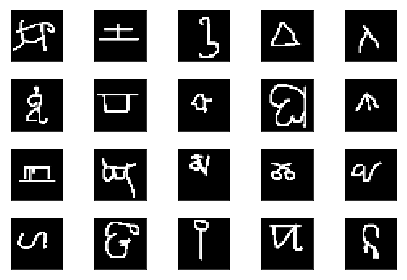

In [35]:

# print(x_p.shape)
print(label_positive)
imgs_show(np.squeeze(x_positive),4,5)



In [37]:
# imgs_show(np.squeeze(images_observe_train_total[80:100]),4,5)

In [38]:
# imgs_show(np.squeeze(images_observe_train_total[0:20]),4,5)

In [39]:
def get_real_mean_var():
    batch_size = 256
    net_auto.set_z_add_random(False)
    net_auto.eval()
    mean_std_list =[MeanVarObject(i) for i in range(class_total_num)]
    
    datas =  get_next_perfect(dataset_train_positive,dataset_negative,6,125,shuffle=False)
    
    for x,y in datas:
        inputs ,lables = torch.from_numpy(x).float().to(device),\
            torch.from_numpy(y).long().to(device)
#         print(torch.sum(lables)) # = 1167
        
        y_onehot = torch.FloatTensor(batch_size, class_total_num).to(device)
        y_onehot.zero_()
        y_onehot.scatter_(1, lables.view(-1,1), 1)
#         print('y_onehot:', y_onehot)
        optimizer.zero_grad()
        optimzer4center.zero_grad()
        
        z , _ = net_auto(x=inputs, y_onehot=y_onehot)
        z_real = z.detach().cpu().numpy()
        for i,label in enumerate(y) :
            mean_std_list[label].add_z(z_real[i])
    return mean_std_list

mean_std_obj_list = get_real_mean_var()

In [40]:
# mean_std_list label : 0 ->984


mean_list = []
std_list =[]
z_total_list = []

for obj in mean_std_obj_list:
#     print(obj.label)
    mean_list.append(obj.get_mean())
    std_list.append(obj.get_std())
    z_total_list.append(obj.get_z_array())

mean_list  = np.array(mean_list)
std_list = np.array(std_list)
z_total_list = np.concatenate(np.array(z_total_list))


In [41]:

print(z_total_list.shape)
mean_z = np.mean(z_total_list,axis=0)
std_z = np.std(z_total_list,axis=0)
color_z = z_total_list * 250
# print(mean_std_obj_list[500].get_mean()[2,:,:])
# print(mean_list.shape)
# print(mean_list[500,2,:,:])
# # print(mean_x[500,2,:,:])
# # print(mean_x[20,2,:,:])
# print(mean_std_obj_list[500].get_std()[2,:,:])
# print(std_list[500,2,:,:])




(19712, 64, 4, 4)


In [42]:
def compute_distance_u_total(z_list,mean_z):
    # mean_std_obj_list[381].get_z_array()
    divider = np.subtract(z_list,mean_z) ** 2
#     print(divider.shape)
    return np.mean(divider,axis=0)

In [43]:
# plt.figure(figsize=(2000,1),dpi=30)
# # plt.text(17527,100,'Pre')
# # my_y_ticks = np.arange(-0.1, 0.1, 0.01)
# # plt.yticks(my_y_ticks)
# d = 2
# w = 1
# h = 0
# print('std_z = ',std_z[d,w,h])
# print('mean = ',u_total_real[d,w,h])

# plt.scatter(x = z_total_list[:,d,w,h],y = np.ones_like(z_total_list[:,d,w,h]),s=75,c =color_z[:,d,w,h],  alpha=.5)
# plt.show()

In [44]:
print('std_z = ',std_z[0:10])

std_z =  [[[0.00025096 0.0008297  0.00101779 0.00062063]
  [0.00116188 0.00397736 0.00398118 0.00154408]
  [0.00132284 0.00429955 0.00432564 0.00166558]
  [0.00071739 0.00300122 0.00298257 0.00123437]]

 [[0.00053489 0.00153266 0.00140635 0.00050271]
  [0.00195024 0.00471511 0.00387323 0.00115634]
  [0.00185923 0.00404716 0.00396107 0.0011855 ]
  [0.00076929 0.00201173 0.00199795 0.0006235 ]]

 [[0.00467744 0.02179141 0.01478235 0.00579202]
  [0.00855709 0.06828844 0.04207013 0.01356138]
  [0.00686337 0.06387652 0.03765944 0.01150492]
  [0.00331259 0.01625117 0.01567353 0.00606961]]

 [[0.00327256 0.00634769 0.00511257 0.00145101]
  [0.0052477  0.00946169 0.00771144 0.0018982 ]
  [0.00354148 0.00652678 0.0056639  0.001665  ]
  [0.00137788 0.00215581 0.00209045 0.00098537]]

 [[0.00069904 0.00353406 0.00359718 0.00155231]
  [0.00114216 0.00463883 0.0045106  0.00198752]
  [0.0007724  0.00354597 0.00331204 0.0016671 ]
  [0.00031451 0.00081842 0.00091222 0.00068487]]

 [[0.00047047 0.00248

In [45]:
color = mean_list * 250
u_total_real = np.mean(mean_list,axis=0)
std_mean_real  = np.mean(np.square(std_list),axis=0)
ui_squ_mean_real  = np.mean(np.square(mean_list),axis=0)
u_total_sque_real = np.square(u_total_real)
std_squ_total = std_mean_real + ui_squ_mean_real - u_total_sque_real
std_total_real = np.sqrt(std_squ_total)

In [46]:
print('std_z = ',std_total_real[2])
# print('mean = ',std_list[1:100,1,1,1])

std_z =  [[0.00467368 0.02178832 0.01477511 0.0057839 ]
 [0.00855695 0.06826904 0.04209697 0.01356574]
 [0.00686346 0.06388269 0.03763835 0.01150891]
 [0.00330517 0.01624168 0.0156757  0.00604656]]


In [47]:
# print('u_total =  ',u_total_real[2,:,:])
# print('std_mean =  ',np.sqrt(std_mean_real[:,0,0]))
# print('ui_squ_mean =  ',ui_squ_mean.shape)
# print('u_total_sque =  ',u_total_sque.shape)
# print('std_squ_total =  ',std_squ_total.shape)
d = 2
w = 1
h = 1
print('std_z = ',std_total_real[d,w,h])
# print('mean = ',u_total_real[d,w,h])
print('std_list = ',std_list[:200,d,w,h])
# print('mean list                = \n',mean_list[25:80,d,w,h])


std_z =  0.068269044
std_list =  [2.3251019e-02 1.5082346e-02 3.6334254e-02 2.2574130e-02 2.8860021e-02
 2.8122284e-02 2.5951108e-02 3.2633360e-02 5.0981622e-02 4.3124508e-02
 2.3126403e-02 2.5231641e-02 4.2024013e-02 4.7631998e-02 4.7102690e-02
 3.9548799e-02 4.0692236e-02 3.1211782e-02 4.3138508e-02 2.7209768e-02
 3.7252903e-09 2.7304066e-02 3.4211066e-02 2.3643406e-02 2.3655696e-02
 5.4851819e-02 2.9797096e-02 0.0000000e+00 2.8942645e-02 3.8069330e-02
 2.8977681e-02 3.0667400e-02 2.7139608e-02 2.7583145e-02 2.8579425e-02
 2.3846585e-02 3.1846810e-02 2.2755908e-02 2.5935240e-02 4.4591043e-02
 3.9362922e-02 3.8657241e-02 3.0650441e-02 4.2384848e-02 2.3437763e-02
 2.6097260e-02 4.1860998e-02 2.6836239e-02 6.3010767e-02 2.3397978e-02
 1.7920626e-02 0.0000000e+00 4.4546451e-02 2.1822631e-02 3.4832753e-02
 2.8472185e-02 5.1044174e-02 2.0535033e-02 2.2860171e-02 2.9034769e-02
 3.4405567e-02 3.1191980e-02 4.3655008e-02 3.1296134e-02 2.8462503e-02
 2.7527384e-02 5.8987021e-02 2.6385857e-02 4

std =  0.068269044
mean =  0.005309885


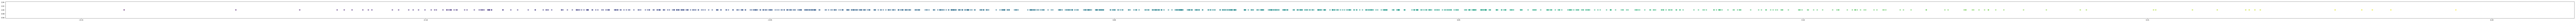

In [48]:
plt.figure(figsize=(300,2))

# my_y_ticks = np.arange(-0.1, 0.1, 0.01)
# plt.yticks(my_y_ticks)


print('std = ',std_total_real[d,w,h])
print('mean = ',u_total_real[d,w,h])
plt.scatter(x = mean_list[:,d,w,h],y = np.ones_like(mean_list[:,d,w,h]),s=75,c =color[:,d,w,h],  alpha=.5)
plt.show()

In [49]:
lables_obser_bias = [241 ,188, 635, 270, 774, 790, 772, 376, 201 , 26, 453, 785 ,875 ,634 ,527 ,718 ,299 ,  6 ,679, 373]
for index ,value in enumerate(lables_obser_bias):
    print(str(index+1)," scale = ",np.sum(np.sort(np.reshape(std_list[value,:,:,:],64*4*4))[-50:]) / np.sum(std_list[value,:,:,:]) )

1  scale =  0.4072288
2  scale =  0.4190787
3  scale =  0.452024
4  scale =  0.39349866
5  scale =  0.44435397
6  scale =  0.40037084
7  scale =  0.40113723
8  scale =  0.39382136
9  scale =  0.354104
10  scale =  0.40126684
11  scale =  0.4403825
12  scale =  0.3833864
13  scale =  0.36363515
14  scale =  0.39288008
15  scale =  0.39564043
16  scale =  0.38720083
17  scale =  0.40311325
18  scale =  0.44586354
19  scale =  0.35029987
20  scale =  0.45946628


In [50]:
lables_obser_bias = [543, 119 ,482 ,541, 806, 602, 211, 757, 600, 969, 942, 107, 752, 729, 698, 153 ,466 ,597,578 ,604]
for index ,value in enumerate(lables_obser_bias):
    print(str(index+1)," scale = ",np.sum(np.sort(np.reshape(std_list[value,:,:,:],64*4*4))[-50:]) / np.sum(std_list[value,:,:,:]) )

1  scale =  0.37987694
2  scale =  0.46192023
3  scale =  0.45857108
4  scale =  0.3868322
5  scale =  0.39551693
6  scale =  0.38770175
7  scale =  0.43521193
8  scale =  0.3895546
9  scale =  0.47222266
10  scale =  0.38394472
11  scale =  0.4432261
12  scale =  0.41616094
13  scale =  0.45857868
14  scale =  0.3902177
15  scale =  0.46089435
16  scale =  0.39551738
17  scale =  0.40086442
18  scale =  0.45593873
19  scale =  0.36868647
20  scale =  0.5346056


In [51]:
lables_obser_bias = [344 ,539, 446, 566 ,431, 680, 161, 164, 336 ,980, 132 , 38, 169 ,660, 795 ,286 ,337 ,939,710, 973]
for index ,value in enumerate(lables_obser_bias):
    print(str(index+1)," scale = ",np.sum(np.sort(np.reshape(std_list[value,:,:,:],64*4*4))[-50:]) / np.sum(std_list[value,:,:,:]) )
    

1  scale =  0.3922672
2  scale =  0.45101756
3  scale =  0.36926344
4  scale =  0.36942428
5  scale =  0.33033836
6  scale =  0.34031427
7  scale =  0.47191623
8  scale =  0.30962354
9  scale =  0.39061046
10  scale =  0.3991686
11  scale =  0.31345293
12  scale =  0.3247645
13  scale =  0.42058977
14  scale =  0.37622562
15  scale =  0.36650363
16  scale =  0.37336713
17  scale =  0.39765158
18  scale =  0.3602746
19  scale =  0.38220343
20  scale =  0.37317276


In [ ]:
print("---------------------------------")
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[847,:,:,:],64*4*4))[-40:]) / np.sum(std_list[847,:,:,:]) )
print("118 scale = ",np.sum(np.sort(np.reshape(std_list[118,:,:,:],64*4*4))[-40:]) / np.sum(std_list[118,:,:,:]) )
print("364 scale = ",np.sum(np.sort(np.reshape(std_list[364,:,:,:],64*4*4))[-40:]) / np.sum(std_list[364,:,:,:]) )
print("239 scale = ",np.sum(np.sort(np.reshape(std_list[239,:,:,:],64*4*4))[-40:]) / np.sum(std_list[239,:,:,:]) )
print("76 scale = ",np.sum(np.sort(np.reshape(std_list[76,:,:,:],64*4*4))[-40:]) / np.sum(std_list[76,:,:,:]) )
print("---------------------------------")
print("936 scale = ",np.sum(np.sort(np.reshape(std_list[936,:,:,:],64*4*4))[-40:]) / np.sum(std_list[936,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[621,:,:,:],64*4*4))[-40:]) / np.sum(std_list[621,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[275,:,:,:],64*4*4))[-40:]) / np.sum(std_list[275,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[121,:,:,:],64*4*4))[-40:]) / np.sum(std_list[121,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[312,:,:,:],64*4*4))[-40:]) / np.sum(std_list[312,:,:,:]) )
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[859,:,:,:],64*4*4))[-40:]) / np.sum(std_list[859,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[389,:,:,:],64*4*4))[-40:]) / np.sum(std_list[389,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[536,:,:,:],64*4*4))[-40:]) / np.sum(std_list[536,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[730,:,:,:],64*4*4))[-40:]) / np.sum(std_list[730,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[332,:,:,:],64*4*4))[-40:]) / np.sum(std_list[332,:,:,:]) )
print("---------------------------------")
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[760,:,:,:],64*4*4))[-40:]) / np.sum(std_list[760,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[397,:,:,:],64*4*4))[-40:]) / np.sum(std_list[397,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[463,:,:,:],64*4*4))[-40:]) / np.sum(std_list[463,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[750,:,:,:],64*4*4))[-40:]) / np.sum(std_list[750,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[803,:,:,:],64*4*4))[-40:]) / np.sum(std_list[803,:,:,:]) )

print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[886,:,:,:],64*4*4))[-40:]) / np.sum(std_list[886,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[882,:,:,:],64*4*4))[-40:]) / np.sum(std_list[882,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[215,:,:,:],64*4*4))[-40:]) / np.sum(std_list[215,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[430,:,:,:],64*4*4))[-40:]) / np.sum(std_list[430,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[861,:,:,:],64*4*4))[-40:]) / np.sum(std_list[861,:,:,:]) )
print("---------------------------------")
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[812,:,:,:],64*4*4))[-40:]) / np.sum(std_list[812,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[623,:,:,:],64*4*4))[-40:]) / np.sum(std_list[623,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[381,:,:,:],64*4*4))[-40:]) / np.sum(std_list[381,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[338,:,:,:],64*4*4))[-40:]) / np.sum(std_list[338,:,:,:]) )
print("847 scale = ",np.sum(np.sort(np.reshape(std_list[840,:,:,:],64*4*4))[-40:]) / np.sum(std_list[840,:,:,:]) )



# print("std fuza = ",np.sum(std_list[847,:,:,:]))
# print("std fuza = ",np.sum(std_list[118,:,:,:]))
# print("std fuza = ",np.sum(std_list[364,:,:,:]))
# print("std fuza = ",np.sum(std_list[239,:,:,:]))
# print("std fuza = ",np.sum(std_list[76,:,:,:]))
# print("---------------------------------")
# print("std fuza = ",np.sum(std_list[936,:,:,:]))
# print("std fuza = ",np.sum(std_list[621,:,:,:]))
# print("std fuza = ",np.sum(std_list[275 ,:,:,:]))
# print("std fuza = ",np.sum(std_list[121 ,:,:,:]))
# print("std fuza = ",np.sum(std_list[312 ,:,:,:]))
# print("---------------------------------")
# print("---------------------------------")
# print("---------------------------------")
# print("std fuza = ",np.sum(std_list[859,:,:,:]))
# print("std fuza = ",np.sum(std_list[389,:,:,:]))
# print("std fuza = ",np.sum(std_list[536 ,:,:,:]))
# print("std fuza = ",np.sum(std_list[730 ,:,:,:]))
# print("std fuza = ",np.sum(std_list[332 ,:,:,:]))
# print("---------------------------------")
# print("std fuza = ",np.sum(std_list[760,:,:,:]))
# print("std fuza = ",np.sum(std_list[397,:,:,:]))
# print("std fuza = ",np.sum(std_list[463 ,:,:,:]))
# print("std fuza = ",np.sum(std_list[750 ,:,:,:]))
# print("std fuza = ",np.sum(std_list[803 ,:,:,:]))
# print("---------------------------------")
# print("---------------------------------")
# print("---------------------------------")
# print("std fuza = ",np.sum(std_list[886,:,:,:]))
# print("std fuza = ",np.sum(std_list[882,:,:,:]))
# print("std fuza = ",np.sum(std_list[215 ,:,:,:]))
# print("std fuza = ",np.sum(std_list[430 ,:,:,:]))
# print("std fuza = ",np.sum(std_list[861 ,:,:,:]))
# print("---------------------------------")
# print("std fuza = ",np.sum(std_list[812,:,:,:]))
# print("std fuza = ",np.sum(std_list[623,:,:,:]))
# print("std fuza = ",np.sum(std_list[381 ,:,:,:]))
# print("std fuza = ",np.sum(std_list[338 ,:,:,:]))
# print("std fuza = ",np.sum(std_list[840 ,:,:,:]))




In [ ]:
print("---------------------------------")
print("std fuza = ",np.sum(std_list[849,:,:,:]))
print("std fuza = ",np.sum(std_list[5,:,:,:]))
print("std fuza = ",np.sum(std_list[101,:,:,:]))
print("std fuza = ",np.sum(std_list[590,:,:,:]))
print("std fuza = ",np.sum(std_list[235,:,:,:]))
print("---------------------------------")
print("std fuza = ",np.sum(std_list[135,:,:,:]))
print("std fuza = ",np.sum(std_list[214,:,:,:]))
print("std fuza = ",np.sum(std_list[465 ,:,:,:]))
print("std fuza = ",np.sum(std_list[411 ,:,:,:]))
print("std fuza = ",np.sum(std_list[901 ,:,:,:]))
print("---------------------------------")
print("std fuza = ",np.sum(std_list[54,:,:,:]))
print("std fuza = ",np.sum(std_list[977,:,:,:]))
print("std fuza = ",np.sum(std_list[580 ,:,:,:]))
print("std fuza = ",np.sum(std_list[764 ,:,:,:]))
print("std fuza = ",np.sum(std_list[403 ,:,:,:]))
print("---------------------------------")
print("std fuza = ",np.sum(std_list[519,:,:,:]))
print("std fuza = ",np.sum(std_list[864,:,:,:]))
print("std fuza = ",np.sum(std_list[916 ,:,:,:]))
print("std fuza = ",np.sum(std_list[675 ,:,:,:]))
print("std fuza = ",np.sum(std_list[964 ,:,:,:]))


print(np.sum(np.sort(np.reshape(std_list[977,:,:,:],64*4*4))[-40:]))
print(np.sum(np.sort(np.reshape(std_list[580,:,:,:],64*4*4))[-40:]))

In [ ]:
print("---------------------------------")
print("std fuza = ",np.sum(std_list[220,:,:,:]))
print("std fuza = ",np.sum(std_list[48,:,:,:]))
print("std fuza = ",np.sum(std_list[379,:,:,:]))
print("std fuza = ",np.sum(std_list[294,:,:,:]))
print("std fuza = ",np.sum(std_list[18,:,:,:]))
print("---------------------------------")
print("std fuza = ",np.sum(std_list[674,:,:,:]))
print("std fuza = ",np.sum(std_list[97,:,:,:]))
print("std fuza = ",np.sum(std_list[348 ,:,:,:]))
print("std fuza = ",np.sum(std_list[65 ,:,:,:]))
print("std fuza = ",np.sum(std_list[831 ,:,:,:]))
print("---------------------------------")
print("std fuza = ",np.sum(std_list[547,:,:,:]))
print("std fuza = ",np.sum(std_list[844,:,:,:]))
print("std fuza = ",np.sum(std_list[236 ,:,:,:]))
print("std fuza = ",np.sum(std_list[172 ,:,:,:]))
print("std fuza = ",np.sum(std_list[424 ,:,:,:]))
print("---------------------------------")
print("std fuza = ",np.sum(std_list[657,:,:,:]))
print("std fuza = ",np.sum(std_list[46,:,:,:]))
print("std fuza = ",np.sum(std_list[3 ,:,:,:]))
print("std fuza = ",np.sum(std_list[255 ,:,:,:]))
print("std fuza = ",np.sum(std_list[470 ,:,:,:]))


print(np.sum(np.sort(np.reshape(std_list[46,:,:,:],64*4*4))[:-100]))
print(np.sum(np.sort(np.reshape(std_list[3,:,:,:],64*4*4))[:-100]))

In [ ]:
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[220].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[48].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[379].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[294].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[18].get_z_array(),mean_z)))
print("---------------------------------")

print('distance_u_simple  = ',np.sum(compute_distance_u_total(mean_std_obj_list[674].get_z_array(),mean_z)))
print('distance_u_simple  = ',np.sum(compute_distance_u_total(mean_std_obj_list[97].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[348].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[65].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[831].get_z_array(),mean_z)))
print("---------------------------------")
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[547].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[844].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[236].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[172].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[424].get_z_array(),mean_z)))
print("---------------------------------")
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[657].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[46].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[3].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[255].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[470].get_z_array(),mean_z)))

In [ ]:

# distance_u_simple = compute_distance_u_total(mean_std_obj_list[simple].get_z_array(),mean_z)

print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[159].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[687].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[486].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[843].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[27].get_z_array(),mean_z)))
print("---------------------------------")

print('distance_u_simple  = ',np.sum(compute_distance_u_total(mean_std_obj_list[253].get_z_array(),mean_z)))
print('distance_u_simple  = ',np.sum(compute_distance_u_total(mean_std_obj_list[909].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[295].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[912].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[714].get_z_array(),mean_z)))
print("---------------------------------")
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[307].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[661].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[858].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[79].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[717].get_z_array(),mean_z)))
print("---------------------------------")
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[122].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[51].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[631].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[828].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[20].get_z_array(),mean_z)))


# print("---------------------------------")
# print("std jiandan = ",np.sum(std_list[761,:,:,:]))
# print("std complex = ",np.sum(std_list[761,:,:,:]))

In [ ]:
print("---------------------------------")
print("std fuza = ",np.sum(std_list[159,:,:,:]))
print("std fuza = ",np.sum(std_list[687,:,:,:]))
print("std fuza = ",np.sum(std_list[486,:,:,:]))
print("std fuza = ",np.sum(std_list[843,:,:,:]))
print("std fuza = ",np.sum(std_list[27,:,:,:]))
print("---------------------------------")
print("std fuza = ",np.sum(std_list[253,:,:,:]))
print("std fuza = ",np.sum(std_list[909,:,:,:]))
print("std fuza = ",np.sum(std_list[295 ,:,:,:]))
print("std fuza = ",np.sum(std_list[912 ,:,:,:]))
print("std fuza = ",np.sum(std_list[714 ,:,:,:]))
print("---------------------------------")
print("std fuza = ",np.sum(std_list[307,:,:,:]))
print("std fuza = ",np.sum(std_list[661,:,:,:]))
print("std fuza = ",np.sum(std_list[858 ,:,:,:]))
print("std fuza = ",np.sum(std_list[79 ,:,:,:]))
print("std fuza = ",np.sum(std_list[717 ,:,:,:]))
print("---------------------------------")
print("std fuza = ",np.sum(std_list[122,:,:,:]))
print("std fuza = ",np.sum(std_list[51,:,:,:]))
print("std fuza = ",np.sum(std_list[631 ,:,:,:]))
print("std fuza = ",np.sum(std_list[828 ,:,:,:]))
print("std fuza = ",np.sum(std_list[20 ,:,:,:]))


print(np.sum(np.sort(np.reshape(std_list[79,:,:,:],64*4*4))[-10:]))
print(np.sum(np.sort(np.reshape(std_list[122,:,:,:],64*4*4))[-10:]))
print(np.sum(np.sort(np.reshape(std_list[486,:,:,:],64*4*4))[-10:]))

In [ ]:
complexs = 239
simple = 381
print("u_total = ",u_total_real[2,:,:])
print("std_real = ",std_total_real[2,:,:])
print("---------------------------------")
# print("fuza = ",mean_list[239,2,:,:])
# print("jiandan = ",mean_list[381,2,:,:])

print("---------------------------------")
# distance_u_complex = compute_distance_u_total(mean_std_obj_list[complexs].get_z_array(),mean_z)
print('distance_u_complex = ',np.sum(compute_distance_u_total(mean_std_obj_list[847].get_z_array(),mean_z)))
print('distance_u_complex = ',np.sum(compute_distance_u_total(mean_std_obj_list[118].get_z_array(),mean_z)))
print('distance_u_complex = ',np.sum(compute_distance_u_total(mean_std_obj_list[239].get_z_array(),mean_z)))
print('distance_u_complex = ',np.sum(compute_distance_u_total(mean_std_obj_list[76].get_z_array(),mean_z)))
print('distance_u_complex = ',np.sum(compute_distance_u_total(mean_std_obj_list[936].get_z_array(),mean_z)))
print('distance_u_complex = ',np.sum(compute_distance_u_total(mean_std_obj_list[621].get_z_array(),mean_z)))
print('distance_u_complex = ',np.sum(compute_distance_u_total(mean_std_obj_list[891].get_z_array(),mean_z)))
print('distance_u_complex = ',np.sum(compute_distance_u_total(mean_std_obj_list[586].get_z_array(),mean_z)))
print("---------------------------------")
# distance_u_simple = compute_distance_u_total(mean_std_obj_list[simple].get_z_array(),mean_z)
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[886].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[882].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[430].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[812].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[623].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[381].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[579].get_z_array(),mean_z)))
print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[559].get_z_array(),mean_z)))
# std_fuza = np.sort(np.reshape(std_list[239,:,:,:],16*4*4))
# std_jiandan = np.sort(np.reshape(std_list[381,:,:,:],16*4*4))
# print("std fuza = ",np.sum(std_fuza[100:150]) )
# print("std jiandan = ",np.sum(std_jiandan[100:150]))
print("---------------------------------")
print("std fuza = ",np.sum(std_list[847,:,:,:]))
print("std fuza = ",np.sum(std_list[118,:,:,:]))
print("std fuza = ",np.sum(std_list[239,:,:,:]))
print("std fuza = ",np.sum(std_list[76,:,:,:]))
print("std fuza = ",np.sum(std_list[936,:,:,:]))
print("std fuza = ",np.sum(std_list[621,:,:,:]))
print("std fuza = ",np.sum(std_list[621,:,:,:]))
print("std fuza = ",np.sum(std_list[366 ,:,:,:]))
print("std fuza = ",np.sum(std_list[292 ,:,:,:]))
print("std fuza = ",np.sum(std_list[479 ,:,:,:]))
print("std fuza = ",np.sum(std_list[955 ,:,:,:]))


# print("---------------------------------")
# print("std fuza = ",np.sum(std_list[661,:,:,:]))
# print("std fuza = ",np.sum(std_list[858,:,:,:]))
# print("std fuza = ",np.sum(std_list[79,:,:,:]))
# print("std fuza = ",np.sum(std_list[159,:,:,:]))
# print("---------------------------------")
print("std jiandan = ",np.sum(std_list[886,:,:,:]))
print("std jiandan = ",np.sum(std_list[882,:,:,:]))
print("std jiandan = ",np.sum(std_list[430,:,:,:]))
print("std jiandan = ",np.sum(std_list[812,:,:,:]))
print("std jiandan = ",np.sum(std_list[623,:,:,:]))
print("std jiandan = ",np.sum(std_list[381,:,:,:]))


print("---------------------------------")
print("std jiandan = ",np.sum(std_list[761,:,:,:]))
print("std jiandan = ",np.sum(std_list[589 ,:,:,:]))
print("std jiandan = ",np.sum(std_list[572 ,:,:,:]))
print("std jiandan = ",np.sum(std_list[129 ,:,:,:]))


# print("---------------------------------")
# print("std jiandan = ",np.sum(std_list[979,:,:,:]))
# print('distance_u_simple = ',np.sum(compute_distance_u_total(mean_std_obj_list[979].get_z_array(),mean_z)))

# mean_std_obj_list[979].get_z_array()[12:14]


In [52]:
batch_size = len(label_observe_total)
lables = np.array([index for index in range(class_total_num)])
lables = torch.from_numpy(lables).long().to(device)
print("get_log_mean_var ,labels = ", lables)
print(lables[-1])
y_onehot = torch.FloatTensor(batch_size, class_total_num).cuda()
y_onehot.zero_()
y_onehot.scatter_(1, lables.view(-1, 1), 1)

mean,var = net_auto.get_log_mean_var(batch_size,y_onehot)

get_log_mean_var ,labels =  tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173

In [ ]:
std = torch.exp(var.cpu()).detach().numpy()
mean_x = mean.cpu().detach().numpy()
# mean_y = np.ones_like(mean_x)
color = (mean_x + 1 ) * 150

u_total = np.mean(mean_x,axis=0)
print('u_total =  ',u_total[:,0,0])
std_mean = np.mean(np.square(std),axis=0)
print('std_mean =  ',np.sqrt(std_mean[:,0,0]))
ui_squ_mean = np.mean(np.square(mean_x),axis=0)
print('ui_squ_mean =  ',ui_squ_mean.shape)
u_total_sque = np.square(u_total)
print('u_total_sque =  ',u_total_sque.shape)
std_squ_total = std_mean + ui_squ_mean - u_total_sque
std_total = np.sqrt(std_squ_total)
print('std_squ_total =  ',std_squ_total.shape)
print('std__total = ',std_total[2,:,:])
print('std__total = ',std_total_real[2,:,:])

In [ ]:
plt.figure(figsize=(200,5))

# my_y_ticks = np.arange(-0.1, 0.1, 0.01)
# plt.yticks(my_y_ticks)

plt.scatter(x = mean_x[:,9,0,0],y = np.ones_like(mean_x[:,9,0,0]),s=75,c =color[:,9,0,0],  alpha=.5)
plt.show()

In [56]:
criterion = nn.MSELoss(reduction='sum')
ones_tensor = torch.ones((1, 32, 32)).float().cuda()
std_total_gpu = torch.from_numpy(std_total_real).cuda()
from scipy import misc
import time

In [ ]:
vec1 = mean_list[122]
vec2 = mean_list[470]
print(np.sqrt(np.sum(np.square( vec1 - vec2 ))))
print(float(np.sum(vec1*vec2)) / np.linalg.norm(vec1)*np.linalg.norm(vec2))
print("----------------------------------")
vec1 = mean_list[122]
vec2 = mean_list[101]
print(np.sqrt(np.sum(np.square( vec1 - vec2 ))))
print(float(np.sum(vec1*vec2)) / np.linalg.norm(vec1)*np.linalg.norm(vec2))
print("----------------------------------")
vec1 = mean_list[122]
vec2 = mean_list[590]
print(np.sqrt(np.sum(np.square( vec1 - vec2 ))))
print(float(np.sum(vec1*vec2)) / np.linalg.norm(vec1)*np.linalg.norm(vec2))



In [230]:
net_auto.set_z_add_random(False)

# sample_p   sample_n 不是对应的label,labl才是

sample_p =   14 #np.random.randint(20)  # 10 # 
sample_p_index = 0
sample_n =   np.random.randint(964)       # 669 # 292 #   500 #    669 # 650 #
sample_index = np.random.randint(18)    # 13  # 1 #    # 13   #  5 #
print('sample_p = {},sample_n ={}, sample_index = {}'.format(sample_p,sample_n,sample_index))

posi = np.concatenate(( np.array(dataset_train_positive[sample_p].imgs[sample_p_index:sample_p_index+1]) , np.array(dataset_negative[sample_n].imgs[sample_index:sample_index+2])))
labl =  np.array([dataset_train_positive[sample_p].label, dataset_negative[sample_n].label,dataset_negative[sample_n].label])
print(dataset_train_positive[sample_p].name)
print(dataset_negative[sample_n].name)
print(labl)
inputs ,lables = torch.from_numpy(posi).float().to(device),\
            torch.from_numpy(labl).long().to(device)
        
y_onehot = torch.FloatTensor(3, class_total_num).to(device)
y_onehot.zero_()
y_onehot.scatter_(1, lables.view(-1,1), 1)
# print('y_onehot:', y_onehot)
# z, det, y_logits = net_auto(x=inputs, y_onehot=y_onehot)
z, det = net_auto(x=inputs, y_onehot=y_onehot)
y_logits = net_auto.class_flow(z)


print('z.size() ' ,z.size())
print('y_logits.size() ' ,y_logits.size())
print(y_logits[1][1])

print(np.sqrt(np.sum((mean_list[labl[0]] - mean_list[labl[1]]) ** 2)))
vec1 = mean_list[labl[0]]
vec2 = mean_list[labl[1]]
vec3 = mean_list[labl[2]]

# print(float(np.sum(vec1*vec2)) / np.linalg.norm(vec1)*np.linalg.norm(vec2))
# print("----------------------------------")

# print(str(labl[1])," scale = ",np.sum(np.sort(np.reshape(std_list[labl[1],:,:,:],64*4*4))[-50:]) / np.sum(std_list[labl[1],:,:,:]) )

sample_p = 14,sample_n =18, sample_index = 17
/home/hyshuai/workspace/dataset/images_evaluation/Tengwar/character23
/home/hyshuai/workspace/dataset/images_background/Gujarati/character09
[661 914 914]
z.size()  torch.Size([3, 64, 4, 4])
y_logits.size()  torch.Size([3, 20])
tensor(0.0224, device='cuda:0', grad_fn=<SelectBackward>)
0.45398453


In [231]:

# print(z[0,0,:,:])
# print(z[1,0,:,:])
# print(z[2,0,:,:])
# divi = z[1]-z[0]
# print(divi[0])

# std_scale = 1.0 / np.exp(abs(mean_list[labl[0]] - mean_list[labl[1]]) / std_total_real ) * 0.5
# print(std_scale) std_total_gpu 可能非常小，造成divide非常大
# divide = torch.div(torch.abs((z[1]- z[0])), std_total_gpu * 0.5 ) 
# # scale = torch.cos(torch.clamp(divide,0,1.57))

# scale = torch.reciprocal(torch.exp(divide))* 0.4 

# # scale = torch.abs(torch.div(std_total_gpu * 0.3, torch.add(torch.sub(z[1],z[0]),1e-4)))
# # scale = torch.clamp(scale,0,1)
# print(scale)
# # scale = 0.39
# divider_z = scale * (z[2] - z[1]) 

# obj = z[0]+ divider_z
# r =  np.random.uniform(0.5, 1.0)
# print('random = ',r)
divide = torch.div(torch.abs(torch.sub(z[1],z[0])), std_total_gpu*0.8 ) 
# scale = torch.cos(torch.clamp(divide,0,1.57))

scale = torch.reciprocal(torch.exp(divide))+0.3
print(scale)
# scale = torch.abs(torch.div(std_total_gpu * 0.3, torch.add(torch.sub(z[1],z[0]),1e-4)))
# scale = torch.clamp(scale,0,1)
# print(scale > 1e-1)
scale = 0.5
divider_z = scale * (z[2] - z[1])
obj = z[0]+ divider_z


# obj = z[0]
# obj[0:30] = obj[0:30]+ divider_z[0:30]
# d = 0
# w = 0
# h = 0
# print('obj after divider = ' ,obj[d,w,h])
# obj[d,w,h] = obj[d,w,h] + 50 * (z[2,d,w,h] - z[1,d,w,h])
# print('obj after compute mean = ' ,obj[d,w,h])



# print('obj mean = ',mean_x[-7,:,0,0])
# print('std_squ_total = ',std_squ_total[:,0,0])

# print(obj.size())
obj = obj.view(-1,*obj.size())
# print(obj.size())
obj_oneshot = y_onehot[0].view(-1,class_total_num)



tensor([[[0.5988, 0.7504, 0.5266, 0.9386],
         [0.7140, 0.8493, 0.3590, 0.9809],
         [1.2738, 0.9784, 0.3566, 1.1188],
         [0.8786, 1.0125, 1.0734, 0.7338]],

        [[0.9392, 0.8793, 1.2722, 1.0814],
         [0.7913, 0.4788, 1.2902, 1.1779],
         [0.5755, 0.3327, 0.5898, 1.0867],
         [0.8973, 1.0634, 0.9202, 1.0257]],

        [[0.3215, 0.3030, 0.4867, 0.3961],
         [0.3043, 0.6675, 0.9217, 0.6315],
         [0.8166, 0.6834, 0.9864, 0.9740],
         [1.2860, 0.4897, 1.1623, 0.3000]],

        ...,

        [[1.1209, 1.1228, 1.0130, 0.9895],
         [0.7619, 0.3584, 1.1685, 1.0091],
         [0.8492, 1.2892, 1.0297, 0.6340],
         [0.9936, 0.9165, 0.7329, 0.3000]],

        [[1.2357, 1.1626, 0.6332, 0.5314],
         [0.3000, 0.4761, 0.8932, 0.7899],
         [0.3138, 0.4284, 0.3298, 0.6447],
         [1.0012, 1.1470, 0.8880, 0.9067]],

        [[0.9910, 0.5595, 0.9464, 0.9838],
         [0.6099, 1.2607, 1.2923, 0.3466],
         [0.6257, 0.5385, 0.88

In [232]:
x_ = net_auto(z = obj,y_onehot = obj_oneshot,eps_std = 1e-8 ,reverse=True)

x_ = torch.clamp(x_,-1,1)
print(x_.size())

print("abs sum = ",torch.sum(torch.abs(x_[0] - inputs[0])))
# print("abs sum = ",torch.sum(x_[0]- inputs[0]))
c = criterion(x_[0] , inputs[0])
# print("criterion sum   = ",c)

c_self = criterion(inputs[0],ones_tensor)
# print("self criterion sum  = ",c_self)
# dd =  torch.sum(torch.mul(x_[0],inputs[0]))
# print("  sum  = ",  dd )
# m1 = torch.norm(x_[0])
# print("  sum  = ",  m1 )
# m2 = torch.norm(inputs[0])
# print("  sum  = ",  m2 )

# l2_self = torch.sum(np.square(x_[0] - inputs[0]))
# print("l2_self sum  = ",l2_self)
# print("divider square = ", torch.sum(torch.mul(divider_z,divider_z)))
print("l2  bi li   = ",c / c_self)
# print("cos distance   = ",dd  / (m1 * m2) )
print('zheng fu  mean distance = ',np.sqrt(np.sum((mean_list[labl[0]] - mean_list[labl[1]]) ** 2)))
print('zheng fu  distance = ',np.sqrt(np.sum(np.square( vec1 - vec2 ))))
print('fu distance = ',np.sqrt(np.sum(np.square( vec2 - vec3 ))))
print(str(sample_n)," zhan bi = ",np.sum(np.sort(np.reshape(std_list[sample_n,:,:,:],64*4*4))[-50:]) / np.sum(std_list[sample_n,:,:,:]) )

torch.Size([1, 1, 32, 32])
abs sum =  tensor(142.8073, device='cuda:0')
l2  bi li   =  tensor(0.4731, device='cuda:0')
zheng fu  mean distance =  0.45398453
zheng fu  distance =  0.45398453
fu distance =  0.0
18  zhan bi =  0.3693858


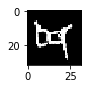

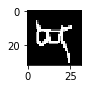

In [233]:
img_show(np.squeeze(x_.data))
img_show(np.squeeze(inputs.data[0]))

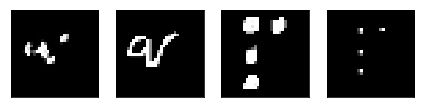

In [185]:
imgs_show(np.squeeze(np.concatenate((x_.data,inputs.data)) ),1,4)

In [ ]:
imgs_show(np.squeeze(np.concatenate((x_.data,inputs.data)) ),1,4)

In [ ]:
# print(np.sqrt(np.sum(np.square( mean_div ))))
# mean_bi = np.clip( abs(mean_div / (std_total_real )),0,1)
# print(mean_bi[0:5])


# # mean_scale  = torch.from_numpy(np.cos(mean_bi)).cuda()
# mean_scale  = torch.reciprocal(torch.exp(torch.from_numpy(mean_bi).cuda()))
# print(mean_scale[0:5])
# nagi_div_bi_std = abs(z[2] - z[1]) / torch.from_numpy(std_list[lable_n]).cuda()
# print(nagi_div_bi_std[0:5])
# n_jian_chu_std = torch.clamp(2 / (nagi_div_bi_std + 1e-8),0,1.5)
# print(n_jian_chu_std[0:5])

In [ ]:
imgs_show(np.squeeze(np.concatenate((x_.data,inputs.data)) ),1,4)

In [ ]:
imgs_show(np.squeeze(np.concatenate((x_.data,inputs.data)) ),1,4)

In [235]:
def sample_and_save(sample_p):
    
    sample_n = np.random.randint(964)
#     sample_index = np.random.randint(18)
    sample_index = np.random.permutation(20)[:2]
    
    print('sample_p = {},sample_n ={}, sample_index = {}'.format(sample_p,sample_n,sample_index))

    posi = np.concatenate(( np.array(dataset_train_positive[sample_p].imgs)  ,  np.array(dataset_negative[sample_n].imgs)[sample_index]   ))
    labl =  np.array([dataset_train_positive[sample_p].label, dataset_negative[sample_n].label,dataset_negative[sample_n].label])
#     print(dataset_train_positive[sample_p].name)
    save_path = dataset_train_positive[sample_p].name.split('/home/hyshuai/workspace/dataset/images_evaluation/')[1]
    save_path = './generate_img64_center01_scale05/' + str(save_path)
    
    if not os.path.isdir(save_path):
        os.makedirs(save_path)
#     print(save_path)
    
    inputs ,lables = torch.from_numpy(posi).float().to(device),\
                torch.from_numpy(labl).long().to(device)

    y_onehot = torch.FloatTensor(3, class_total_num).to(device)
    y_onehot.zero_()
    y_onehot.scatter_(1, lables.view(-1,1), 1)
    # print('y_onehot:', y_onehot)
    # z, det, y_logits = net_auto(x=inputs, y_onehot=y_onehot)
    z, det = net_auto(x=inputs, y_onehot=y_onehot)
#     y_logits = net_auto.class_flow(z)
    
    
    #divide = torch.div(torch.abs(torch.sub(z[1],z[0])), std_total_gpu) 

    #scale = torch.reciprocal(torch.exp(divide))
    scale = 0.5
    divider_z = scale * (z[2] - z[1])
    obj = z[0] + divider_z

    obj = obj.view(-1,*obj.size())
    obj_oneshot = y_onehot[0].view(-1,class_total_num)

    
    
    
    
    x_ = net_auto(z = obj,y_onehot = obj_oneshot,eps_std = None ,reverse=True)

    x_ = torch.clamp(x_,-1,1)
    
    diffrent_b = criterion(x_[0] , inputs[0]) / criterion(inputs[0],ones_tensor)
#     print(' diffrent_b = ',diffrent_b)

    x_ = np.squeeze(x_.data.cpu().numpy())
#     print(x_.shape)
    tt = int(round(time.time() * 1000))
    misc.imsave(save_path+"/"+str(tt)+"_"+str(diffrent_b.data.cpu())+ ".png",x_)

In [237]:
for _ in range(1000):

    sample_and_save(14)#7

sample_p = 14,sample_n =617, sample_index = [ 6 17]
sample_p = 14,sample_n =353, sample_index = [16 18]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


sample_p = 14,sample_n =845, sample_index = [13  3]
sample_p = 14,sample_n =140, sample_index = [16 11]
sample_p = 14,sample_n =287, sample_index = [14 17]
sample_p = 14,sample_n =407, sample_index = [11 12]
sample_p = 14,sample_n =927, sample_index = [14 10]
sample_p = 14,sample_n =102, sample_index = [19 17]
sample_p = 14,sample_n =102, sample_index = [ 9 13]
sample_p = 14,sample_n =642, sample_index = [ 4 11]
sample_p = 14,sample_n =793, sample_index = [ 8 18]
sample_p = 14,sample_n =840, sample_index = [7 3]
sample_p = 14,sample_n =95, sample_index = [16  7]
sample_p = 14,sample_n =410, sample_index = [16  5]
sample_p = 14,sample_n =459, sample_index = [14  9]
sample_p = 14,sample_n =941, sample_index = [3 0]
sample_p = 14,sample_n =59, sample_index = [19 14]
sample_p = 14,sample_n =695, sample_index = [4 0]
sample_p = 14,sample_n =379, sample_index = [ 5 19]
sample_p = 14,sample_n =803, sample_index = [10 19]
sample_p = 14,sample_n =844, sample_index = [5 0]
sample_p = 14,sample_n

sample_p = 14,sample_n =811, sample_index = [3 5]
sample_p = 14,sample_n =93, sample_index = [ 6 18]
sample_p = 14,sample_n =461, sample_index = [8 6]
sample_p = 14,sample_n =596, sample_index = [ 6 16]
sample_p = 14,sample_n =335, sample_index = [17  0]
sample_p = 14,sample_n =347, sample_index = [4 2]
sample_p = 14,sample_n =383, sample_index = [3 7]
sample_p = 14,sample_n =412, sample_index = [13  1]
sample_p = 14,sample_n =4, sample_index = [13 14]
sample_p = 14,sample_n =156, sample_index = [4 8]
sample_p = 14,sample_n =614, sample_index = [ 9 19]
sample_p = 14,sample_n =796, sample_index = [ 3 12]
sample_p = 14,sample_n =679, sample_index = [6 9]
sample_p = 14,sample_n =355, sample_index = [10 14]
sample_p = 14,sample_n =137, sample_index = [0 2]
sample_p = 14,sample_n =806, sample_index = [12 19]
sample_p = 14,sample_n =913, sample_index = [4 2]
sample_p = 14,sample_n =600, sample_index = [9 0]
sample_p = 14,sample_n =542, sample_index = [5 4]
sample_p = 14,sample_n =518, sample

sample_p = 14,sample_n =731, sample_index = [19  5]
sample_p = 14,sample_n =419, sample_index = [15  7]
sample_p = 14,sample_n =517, sample_index = [ 4 17]
sample_p = 14,sample_n =286, sample_index = [17 11]
sample_p = 14,sample_n =594, sample_index = [0 7]
sample_p = 14,sample_n =53, sample_index = [ 1 14]
sample_p = 14,sample_n =743, sample_index = [ 7 13]
sample_p = 14,sample_n =917, sample_index = [15  9]
sample_p = 14,sample_n =745, sample_index = [1 3]
sample_p = 14,sample_n =532, sample_index = [5 9]
sample_p = 14,sample_n =113, sample_index = [11 17]
sample_p = 14,sample_n =960, sample_index = [18 13]
sample_p = 14,sample_n =591, sample_index = [4 0]
sample_p = 14,sample_n =547, sample_index = [19 14]
sample_p = 14,sample_n =699, sample_index = [14  3]
sample_p = 14,sample_n =644, sample_index = [ 0 18]
sample_p = 14,sample_n =512, sample_index = [2 6]
sample_p = 14,sample_n =118, sample_index = [ 9 10]
sample_p = 14,sample_n =370, sample_index = [19 18]
sample_p = 14,sample_n 

sample_p = 14,sample_n =398, sample_index = [18 15]
sample_p = 14,sample_n =852, sample_index = [ 1 18]
sample_p = 14,sample_n =461, sample_index = [11  9]
sample_p = 14,sample_n =286, sample_index = [19  6]
sample_p = 14,sample_n =238, sample_index = [19  0]
sample_p = 14,sample_n =16, sample_index = [ 5 17]
sample_p = 14,sample_n =282, sample_index = [ 9 14]
sample_p = 14,sample_n =906, sample_index = [7 1]
sample_p = 14,sample_n =453, sample_index = [16 15]
sample_p = 14,sample_n =487, sample_index = [ 5 15]
sample_p = 14,sample_n =692, sample_index = [0 2]
sample_p = 14,sample_n =169, sample_index = [ 8 18]
sample_p = 14,sample_n =593, sample_index = [12  7]
sample_p = 14,sample_n =46, sample_index = [ 3 14]
sample_p = 14,sample_n =558, sample_index = [11 19]
sample_p = 14,sample_n =267, sample_index = [19  3]
sample_p = 14,sample_n =808, sample_index = [1 3]
sample_p = 14,sample_n =524, sample_index = [6 9]
sample_p = 14,sample_n =849, sample_index = [ 7 11]
sample_p = 14,sample_n

sample_p = 14,sample_n =636, sample_index = [9 3]
sample_p = 14,sample_n =698, sample_index = [10 13]
sample_p = 14,sample_n =210, sample_index = [ 3 18]
sample_p = 14,sample_n =65, sample_index = [18 13]
sample_p = 14,sample_n =726, sample_index = [17  1]
sample_p = 14,sample_n =567, sample_index = [ 0 18]
sample_p = 14,sample_n =506, sample_index = [ 1 15]
sample_p = 14,sample_n =910, sample_index = [19  2]
sample_p = 14,sample_n =115, sample_index = [6 9]
sample_p = 14,sample_n =266, sample_index = [12 17]
sample_p = 14,sample_n =341, sample_index = [ 8 11]
sample_p = 14,sample_n =572, sample_index = [18  9]
sample_p = 14,sample_n =502, sample_index = [13 17]
sample_p = 14,sample_n =781, sample_index = [13  0]
sample_p = 14,sample_n =96, sample_index = [ 6 16]
sample_p = 14,sample_n =542, sample_index = [14  5]
sample_p = 14,sample_n =607, sample_index = [ 9 12]
sample_p = 14,sample_n =396, sample_index = [13  5]
sample_p = 14,sample_n =227, sample_index = [10  9]
sample_p = 14,samp

sample_p = 14,sample_n =415, sample_index = [15 13]
sample_p = 14,sample_n =66, sample_index = [10 14]
sample_p = 14,sample_n =389, sample_index = [14  6]
sample_p = 14,sample_n =228, sample_index = [ 8 15]
sample_p = 14,sample_n =142, sample_index = [8 1]
sample_p = 14,sample_n =323, sample_index = [ 8 13]
sample_p = 14,sample_n =229, sample_index = [3 9]
sample_p = 14,sample_n =862, sample_index = [ 4 14]
sample_p = 14,sample_n =240, sample_index = [ 6 19]
sample_p = 14,sample_n =408, sample_index = [ 1 13]
sample_p = 14,sample_n =56, sample_index = [12  0]
sample_p = 14,sample_n =356, sample_index = [8 4]
sample_p = 14,sample_n =803, sample_index = [17  3]
sample_p = 14,sample_n =94, sample_index = [15 19]
sample_p = 14,sample_n =444, sample_index = [14 13]
sample_p = 14,sample_n =291, sample_index = [ 5 10]
sample_p = 14,sample_n =14, sample_index = [9 6]
sample_p = 14,sample_n =365, sample_index = [19 12]
sample_p = 14,sample_n =639, sample_index = [ 9 18]
sample_p = 14,sample_n =

sample_p = 14,sample_n =367, sample_index = [14  0]
sample_p = 14,sample_n =769, sample_index = [18 12]
sample_p = 14,sample_n =285, sample_index = [ 8 13]
sample_p = 14,sample_n =536, sample_index = [ 6 12]
sample_p = 14,sample_n =568, sample_index = [18 10]
sample_p = 14,sample_n =134, sample_index = [11  6]
sample_p = 14,sample_n =259, sample_index = [ 4 12]
sample_p = 14,sample_n =528, sample_index = [11 14]
sample_p = 14,sample_n =198, sample_index = [1 2]
sample_p = 14,sample_n =775, sample_index = [4 9]
sample_p = 14,sample_n =447, sample_index = [ 0 13]
sample_p = 14,sample_n =19, sample_index = [19  8]
sample_p = 14,sample_n =306, sample_index = [6 3]
sample_p = 14,sample_n =532, sample_index = [10 14]
sample_p = 14,sample_n =486, sample_index = [18  8]
sample_p = 14,sample_n =181, sample_index = [13 15]
sample_p = 14,sample_n =202, sample_index = [5 1]
sample_p = 14,sample_n =459, sample_index = [6 5]
sample_p = 14,sample_n =268, sample_index = [9 1]
sample_p = 14,sample_n =5

In [ ]:
# for i in range(0,20):

#     for _ in range(1000):

#         sample_and_save(i)

In [ ]:
# dim_i = 10
# print('mean_x -7 = ',mean_x[sample_p,:dim_i,0,0])
# print('mean_x 100 = ',mean_x[100,:dim_i,0,0])
# print('std -7 = ',std[sample_p,:dim_i,0,0])
# print('std 100 = ',std[100,:dim_i,0,0])


# print('u_total= ',u_total[:dim_i,0,0])
# distance = mean_x[-7,:dim_i,0,0] -u_total[:dim_i,0,0]

# print('sample mean distance mean_total = ', distance)
# print('max =',np.max(distance))
# print('min =',np.min(distance))

# print('std__total = ',std_total)

In [ ]:
# obj = z[0]

# scale = 1.0
# # print('scale = ', scale)
# start_index = np.random.randint(0,44)
# # start_index = 0
# end_index = start_index + 20
# print('scale = {},start_index ={}, end_index = {}'.format(scale,start_index,end_index))
# # print('----------------------2-------------------------------')
# # max_std_index = torch.argmax(std_[-7,start_index:end_index,0,0])
# # print(max_std_index)
# # print(std_[-7,start_index:end_index,0,0][max_std_index])
# # print(torch.max(std_[-7,start_index:end_index,0,0]))
# # divider =   scale * (z[1][start_index:end_index][max_std_index] - z[2][start_index:end_index][max_std_index])
# # distance_1 = obj[start_index:end_index] +  divider - mean_[-7,start_index:end_index,:,:]












# # slic_index = np.random.permutation(64)[:20]
# # print(slic_index) 

# divider =   z[1][start_index:end_index] - z[2][start_index:end_index]
# distance_1 = obj[start_index:end_index] +  divider - mean_[sample_p,start_index:end_index,:,:]
# # print('distance_1  = ' , torch.abs(distance_1))
# distance =    distance_1  # / std_[sample_p,start_index:end_index,:,:]  #mean 取对应label
# div_max_dim = flat_index_to_tensor(torch.argmax(torch.abs(distance)))
# c,w,h = div_max_dim
# print('----------------------1-------------------------------')

# print('distance_max_dim  = ' , div_max_dim)
# print('distance_ max   = ' , distance[div_max_dim])
# print('distance__max  = ' , torch.max(torch.abs(distance)))
# print('----------------------2-------------------------------')
# print('std  = ' , std_[sample_p,c,w,h ])
# print('mean_a1 = ',mean_[sample_p,c,w,h ])
# u_total_t = torch.from_numpy(u_total).cuda()
# print('mean_total  = ',u_total[c,w,h ])
# print('a1  = ',obj[c,w,h])
# print('----------------------3-------------------------------')
# s_max = 1
# c,w,h = div_max_dim
# print(c,w,h)

# a_u_distance_p = mean_[sample_p,c,w,h ] - obj[c,w,h] + s_max * std_[sample_p, c,w,h]
            


# scale_real_p  =  a_u_distance_p / divider[c,w,h]
# print(scale_real_p)
# a_u_distance_n = mean_[sample_p, c,w,h ] - obj[c,w,h] - s_max * std_[sample_p,  c,w,h]
            
# scale_real_n  =  a_u_distance_n / divider[c,w,h]
# print(scale_real_n)


# if torch.abs(obj[div_max_dim] + scale_real_p * divider[div_max_dim] - u_total_t[div_max_dim]) < \
#         torch.abs(obj[div_max_dim] + scale_real_n * divider[div_max_dim]  - u_total_t[div_max_dim]) :
#     scale_real = scale_real_p
# else :
#     scale_real = scale_real_n
# # if scale_real < -0.5 :
# #     scale_real = -0.5
# # elif scale_real > 0.5:
# #     scale_real = 0.5
# if scale_real < 0.2 and scale_real > 0:
#     scale_real = 0.2
# elif scale_real >  -0.2 and scale_real < 0:
#     scale_real = -0.2


# # scale_real = -0.3

# # if torch.abs(scale_real_p) < torch.abs(scale_real_n) :
# #     scale_real = scale_real_p
# # else :
# #     scale_real = scale_real_n
# # scale_real = -0.3
# print('---------------------- 4 -------------------------------')
# obj[start_index:end_index] = obj[start_index:end_index] + scale_real * divider
# print('scale_real  = ',scale_real)
# print('after scale_real   = ',obj[div_max_dim])

# # obj[start_index:end_index] = z[0] + scale_real_n * divider
# # print('after scale_real_n   = ',obj[div_max_dim])

# obj = obj.view(-1,*obj.size())
# obj_oneshot = y_onehot[0].view(-1,class_total_num)